# Main Problem:

### To maximise company profits, how can we succinctly assess individual features' influence on expenditure and promotional outcomes? 


In [3]:
#Importing the Libraries
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib import colors
sb.set() 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [4]:
#Loading the dataset
PersonData= pd.read_csv("marketing_campaign.csv", sep="\t")
PersonData.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
print("Data type : ", type(PersonData))
print("Data dims : ", PersonData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2240, 29)


__Description of the dataset is as follows:__
### People

> **ID** : Customer's unique identifier  
> **Year_Birth** : Customer's birth year  
> **Education**: Customer's education  
> **Income**: Customer's yearly household income  
> **Kidhome**: Number of children in customer's household  
> **Teenhome**: Number of teenagers in customer's household  
> **Dt_Customer**: Date of customer's enrollment with the company  
> **Recency**: Number of days since customer's last purchase  
> **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise  

### Products

> **MntWines**: Amount spent on wine in last 2 years  
> **MntFruits**: Amount spent on fruits in last 2 years  
> **MntMeatProducts**: Amount spent on meat in last 2 years  
> **MntFishProducts**: Amount spent on fish in last 2 years  
> **MntSweetProducts**: Amount spent on sweets in last 2 years  
> **MntGoldProds**: Amount spent on gold### Promotion

> **NumDealsPurchases**: Number of purchases made with a discount  
> **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
> **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
> **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
> **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
> **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
> **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise  

### Place

> **NumWebPurchases**: Number of purchases made through the company’s website  
> **NumCatalogPurchases**: Number of purchases made using a catalogue  
> **NumStorePurchases**: Number of purchases made directly in stores  
> **NumWebVisitsMonth**: Number of visits to company’s website in the last month  
tsMonth: Number of visits to company’s website in the last month


# 1. Data Cleaning  

In [5]:
print(PersonData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We see that the only one with Null values is income.

In [5]:
Income=pd.DataFrame(PersonData['Income'])

In [6]:
Income.describe()

Income
count    2216.000000
mean    52247.251354
std     25173.076661
min      1730.000000
25%     35303.000000
50%     51381.500000
75%     68522.000000
max    666666.000000

<Axes: >

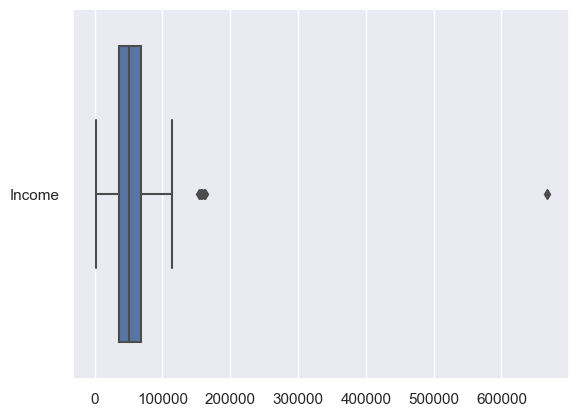

In [7]:
sb.boxplot(data = Income, orient = "h")

In [8]:
#Hence as there is such a high outlier, we cant use mean. Hence we use median.
PersonData['Income'].fillna(PersonData['Income'].median(), inplace=True)

In [9]:
#check if changes have been made 
print(PersonData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We see that Dt_Customer which tells us the date of enrolment is an object, we can change it to datetime and convert data to determine how long they have been a customer.

In [10]:
PersonData["Dt_Customer"] = pd.to_datetime(PersonData["Dt_Customer"], dayfirst=True)
dates = []
for i in PersonData["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [11]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
PersonData["Customer_For"] = days
PersonData["Customer_For"] = pd.to_numeric(PersonData["Customer_For"], errors="coerce")

In [12]:
#check for unique values in dataset
PersonData.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Customer_For            663
dtype: int64

We then explore and check the other features to see what the unique values are, to hopefully simplify them before we convert the categorical values to numerical value.

In [13]:
print("Total categories in the feature Marital_Status:\n", PersonData["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", PersonData["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [14]:
#Segmenting education levels in three groups
PersonData["Education"]=PersonData["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Deriving living situation by marital status"Alone"
PersonData["Living_With"]=PersonData["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

Other things we can decidedly change are also the year of birth which is difficult to deal with in its original form. The same can also be said for the naming of products bought. Lastly, we calculate total expenditure. 


In [15]:
 
PersonData["Age"] = 2021-PersonData["Year_Birth"]

#Total spendings on various items
PersonData["Spent"] = PersonData["MntWines"]+PersonData["MntFruits"]+ PersonData["MntMeatProducts"]+ PersonData["MntFishProducts"]+PersonData["MntSweetProducts"]+PersonData["MntGoldProds"]

#For clarity
PersonData=PersonData.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


We derive some other variables likely to be useful here

In [16]:
#Deriving living situation by marital status"Alone"
PersonData["Living_With"]=PersonData["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
PersonData["Children"]=PersonData["Kidhome"]+PersonData["Teenhome"]

#Feature for total members in the householde
PersonData["Family_Size"] = PersonData["Living_With"].replace({"Alone": 1, "Partner":2})+ PersonData["Children"]

#Feature pertaining parenthood
PersonData["Is_Parent"] = np.where(PersonData.Children> 0, 1, 0)

PersonData['Accepted']=PersonData["AcceptedCmp1"]+PersonData["AcceptedCmp2"]+PersonData["AcceptedCmp3"]+PersonData["AcceptedCmp4"]+PersonData["AcceptedCmp5"]


We remove data that has been changed or do not value-add such as z_CostContact and Z_Revenue which only have 1 unique value. 

In [17]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
Pdata = PersonData.drop(to_drop, axis=1)

In [18]:
Pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

As can be seen from the previous income level, we see that there seems to be an outlier for income, we check the describe function to try to identify what other criterias has an outlier

In [19]:
Pdata.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52237.975446     0.444196     0.506250    49.109375   303.935714   
std     25037.955891     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51381.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp2     Complain     Response  Customer_For          Age  \
count   2240.000000  2240.000000  2240.000000  2.240000e+03  2240.000000   
mean       0.013393     0.009375     0.149107  3.054950e+16    52.194196   
std        0.114976     0.096391     0.356274  1.746339e+16    11.984069   
min        0.000000     0.000000     0.000000  0.000000e+00    25.000000   
25%        0.000000     0.000000     0.000000  1.561680e+16    44.000000   
50%        0.000000     0.000000     0.000000  3.071520e+16    51.000000   
75%        0.000000     0.000000     0.000000  4.570560e+16    62.000000   
max        1.000000     1.000000     1.000000  6.039360e+16   128.000000   

             Spent     Children  Family_Size    Is_Parent     Accepted  
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean    605.798214     0.950446     2.595089     0.715179     0.297768  
std     602.249288     0.751803     0.906959     0.451430     0.678381  
min       5.000000     0.000000     1.000000     0.000000     0.000000  
25%      68.750000     0.000000     2.000000     0.000000     0.000000  
50%     396.000000     1.000000     3.000000     1.000000     0.000000  
75%    1045.500000     1.000000     3.000000     1.000000     0.000000  
max    2525.000000     3.000000     5.000000     1.000000     4.000000  

[8 rows x 29 columns]

We see that there are some values which dont add up such as age and income. As such we print out potential important integer values to spot and remove other outliers. 

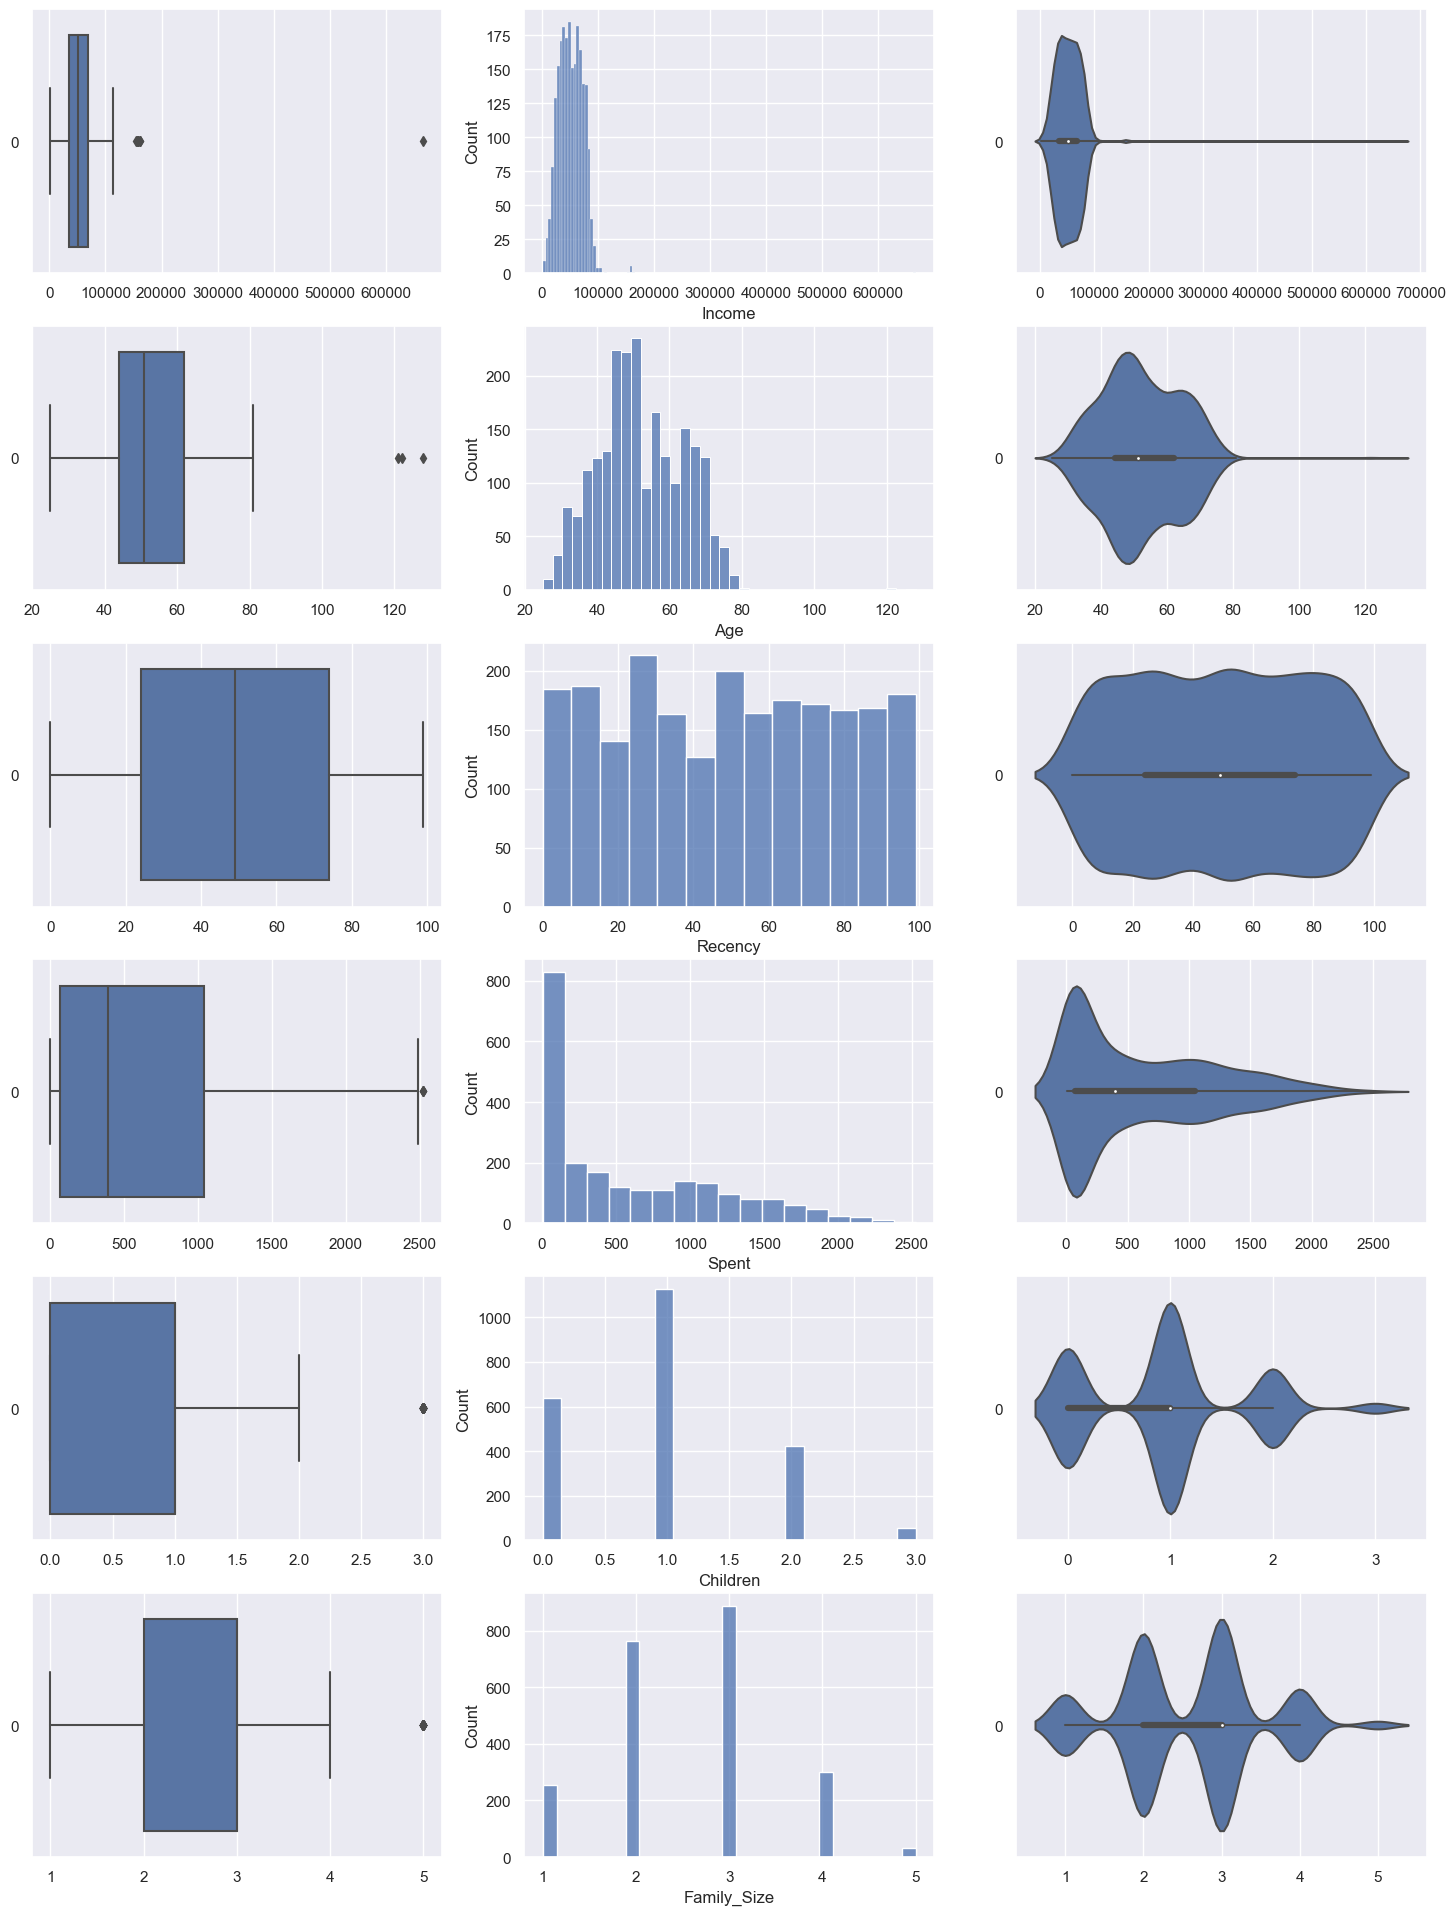

In [20]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

numDF = pd.DataFrame(Pdata[["Income", "Age", "Recency", "Spent", "Children", "Family_Size"]])

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

We see that the main outliers are in income and age and remove them.

We also see that most have one children or have a partner.

In [21]:
#Dropping the outliers by setting a cap on Age and income. 
PersonData = Pdata[(Pdata["Age"]<90)]
PersonData = Pdata[(Pdata["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(PersonData))

The total number of data-points after removing the outliers are: 2239


In [22]:
#Double check to see if there are anymore null values
Pdata.isna().any()

Education              False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
Wines                  False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Customer_For           False
Living_With            False
Age                    False
Spent                  False
Children               False
Family_Size            False
Is_Parent              False
Accepted               False
dtype: bool

### Categorical to Numerical
Next we want to convert categorical values to its numerical counterpart for easier comparison

In [23]:
#first we seperate the categorical data from the whole 
objectType = (PersonData.dtypes == 'object')
object_cols = list(objectType[objectType].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [24]:
!pip install category_encoders
from category_encoders import OrdinalEncoder

# Define the order of categories
Education_order = ['Undergraduate', "Graduate", "Postgraduate"]

# Define the order of categories
LivingWith_order = ['Alone', "Partner"]


# Initialize and fit the OrdinalEncoder for specific columns
encoder = OrdinalEncoder(cols=['Education', 'Living_With'],
                         mapping=[{'col': 'Living_With', 'mapping': {Living: i for i, Living in enumerate(LivingWith_order)}},
                                  {'col': 'Education', 'mapping': {edu: i for i, edu in enumerate(Education_order)}}])
encoded_Pdata = encoder.fit_transform(PersonData)

# Display the encoded DataFrame
print(encoded_Pdata)

      Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             1  58138.0        0         0       58    635      88   546   
1             1  46344.0        1         1       38     11       1     6   
2             1  71613.0        0         0       26    426      49   127   
3             1  26646.0        1         0       26     11       4    20   
4             2  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          1  61223.0        0         1       46    709      43   182   
2236          2  64014.0        2         1       56    406       0    30   
2237          1  56981.0        0         0       91    908      48   217   
2238          2  69245.0        0         1        8    428      30   214   
2239          2  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  Complain  Response       Customer_For  Living_With

# 2. Exploratory data analysis

In [25]:
PersonData.nunique()

Education                 3
Income                 1974
Kidhome                   3
Teenhome                  3
Recency                 100
Wines                   776
Fruits                  158
Meat                    558
Fish                    182
Sweets                  177
Gold                    213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Customer_For            663
Living_With               2
Age                      59
Spent                  1054
Children                  4
Family_Size               5
Is_Parent                 2
Accepted                  5
dtype: int64

## a. We visualise the categorical contents
- Education
- Is_Parent
- Complain
- Response
- Family_size
- Accepted

<Figure size 800x800 with 0 Axes>

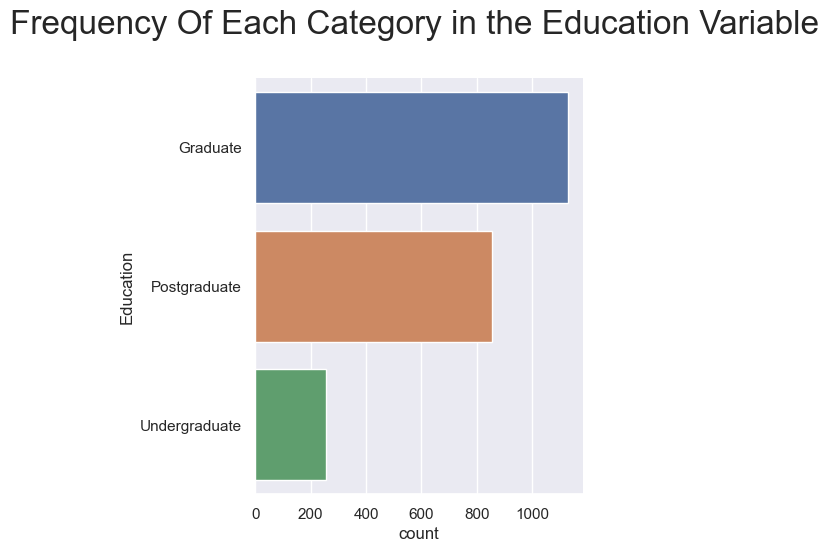

<Figure size 800x800 with 0 Axes>

In [26]:
#VISUALIZING THE "Education"
sb.catplot(y = "Education", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
We see that there are a larger number of graduates than postgraduates and undergraduates

<Figure size 800x800 with 0 Axes>

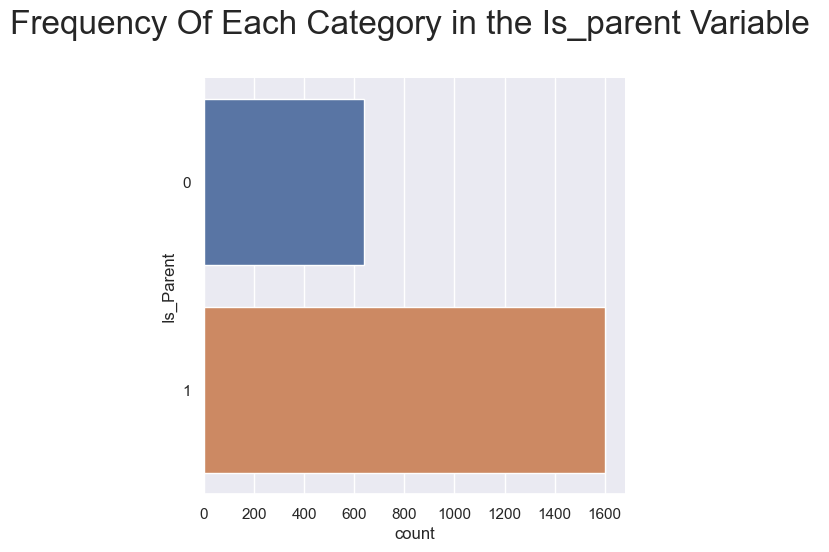

<Figure size 800x800 with 0 Axes>

In [27]:
#VISUALIZING is parent
sb.catplot(y = "Is_Parent", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the Is_parent Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
In this case, we see that the customer base mainly consists of parents

<Figure size 800x800 with 0 Axes>

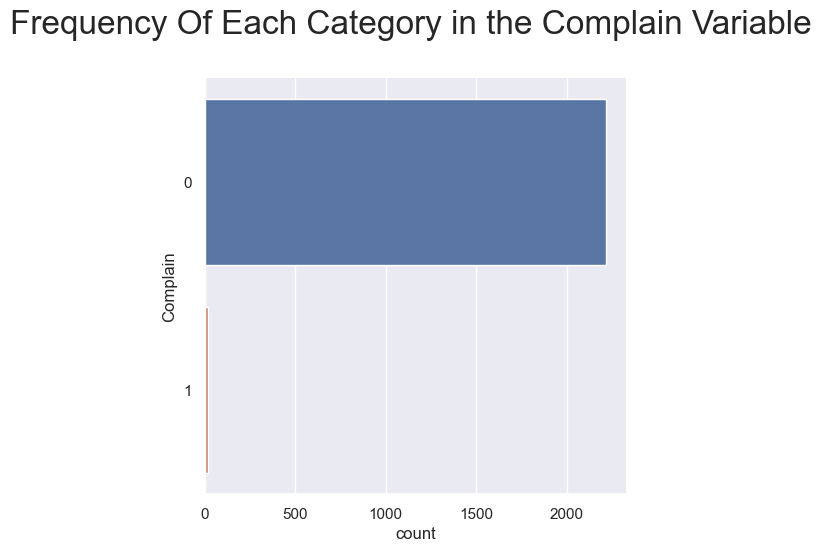

<Figure size 800x800 with 0 Axes>

In [28]:
#VISUALIZING THE "Complain"
sb.catplot(y = "Complain", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the Complain Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
In this case, we see that there are a low number of complains which is good and means they are unlikely to be a factor in our data.As such we can remove them from the data.

In [29]:
column_to_drop = 'Complain'

# Drop the column
Pdata.drop(column_to_drop, axis=1, inplace=True)

<Figure size 800x800 with 0 Axes>

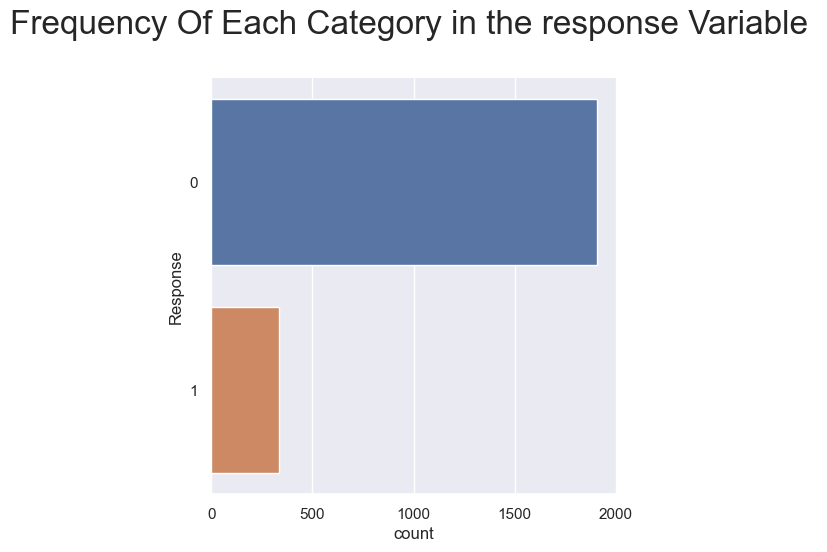

<Figure size 800x800 with 0 Axes>

In [30]:
#VISUALIZING THE "Response"
sb.catplot(y = "Response", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the response Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
In this case, we see that there are a low number of response to the campaigns which suggest that more needs to be done to attract attention

<Figure size 800x800 with 0 Axes>

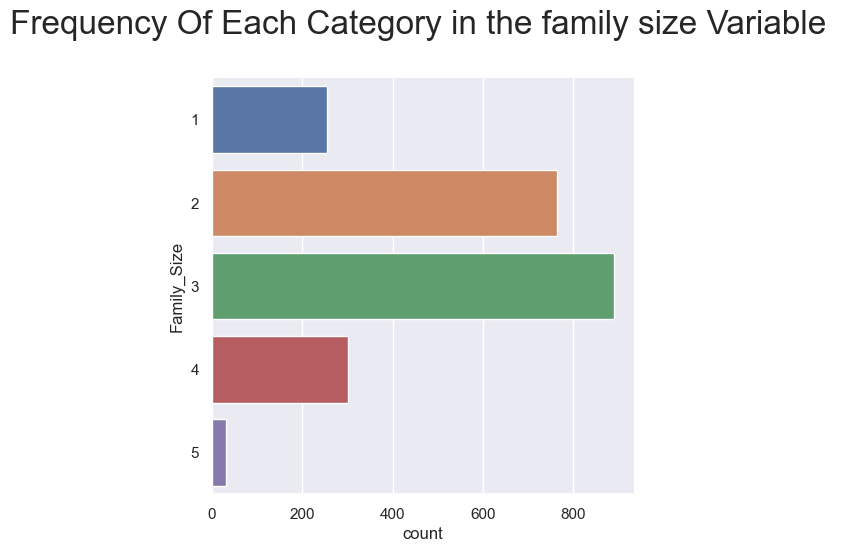

<Figure size 800x800 with 0 Axes>

In [31]:
#VISUALIZING THE "Family_size"
sb.catplot(y = "Family_Size", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the family size Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
In this case we see that a family size of three is the most common, while couples are second most, hence campaigns targeted for single child families and couples may be beneficial

<Figure size 800x800 with 0 Axes>

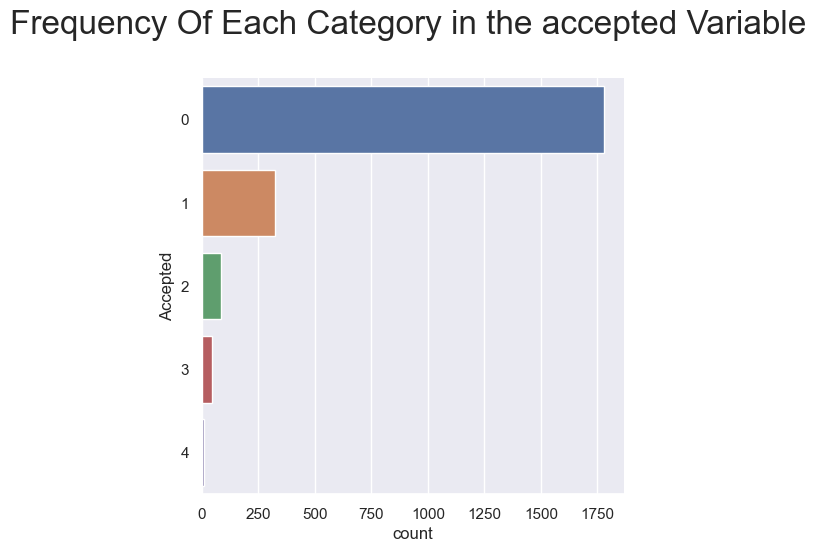

<Figure size 800x800 with 0 Axes>

In [32]:
#VISUALIZING THE "Accepted"
sb.catplot(y = "Accepted", data = Pdata, kind = "count")
plt.title("Frequency Of Each Category in the accepted Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#### Insight: 
In this case, we see that there are a low number of the acceptance of promotions which suggest that more needs to be done to attract attention to them, or more promotions that cater to the customer base could be formed. 

## b. Pairplot
- How numerical categories interact with each other

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

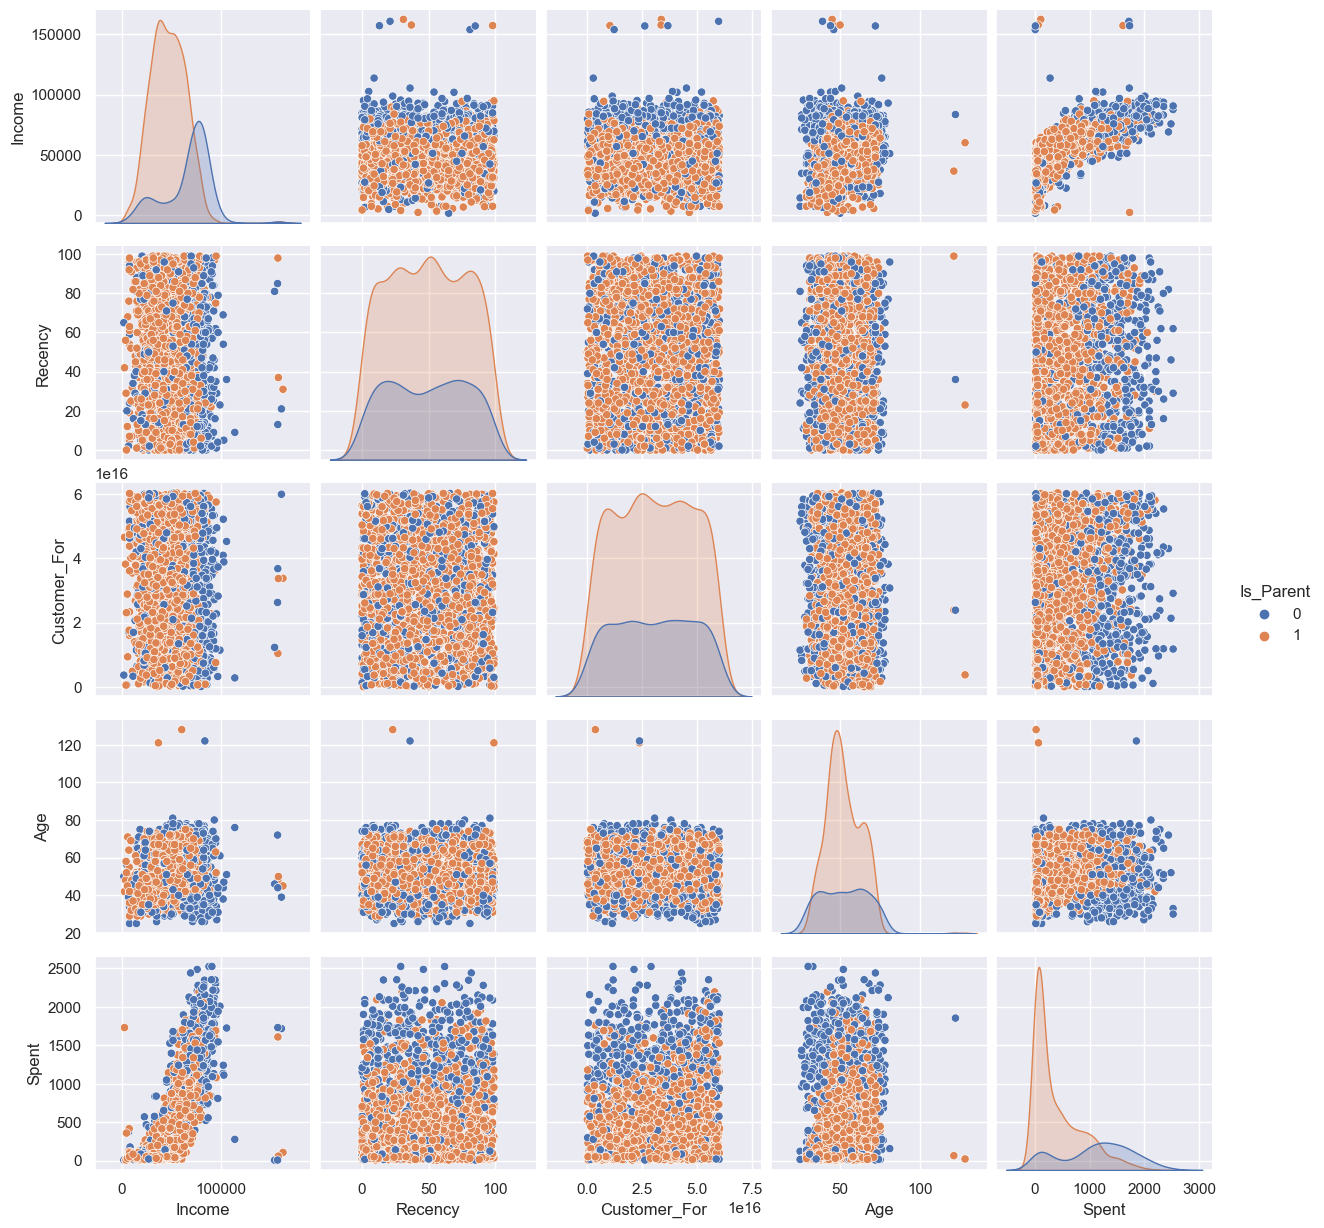

In [33]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sb.pairplot(PersonData[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

We can easily tell from the graph which factors might be more important. As shown in the last column, income and is_parent are variables that seem to heavily affect spending as compared to factors such as recency, customer_for and age. 

## c. Correlation Matrix
- How features interact with each other
- Focus on correlations above 0.70

### Identify groups of common features for more segregated and clearer confusion matrix

In [34]:

Customer_feature = encoded_Pdata[["Education", "Income", "Recency", "Customer_For", "Age", "Family_Size"]]
Expenditure = encoded_Pdata[["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Spent"]]
Type_of_purchases = encoded_Pdata[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]]
Accept=encoded_Pdata[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response"]]

### 1. How Customer features interact with expenditure 

This tells us which products customers are more interested to buy

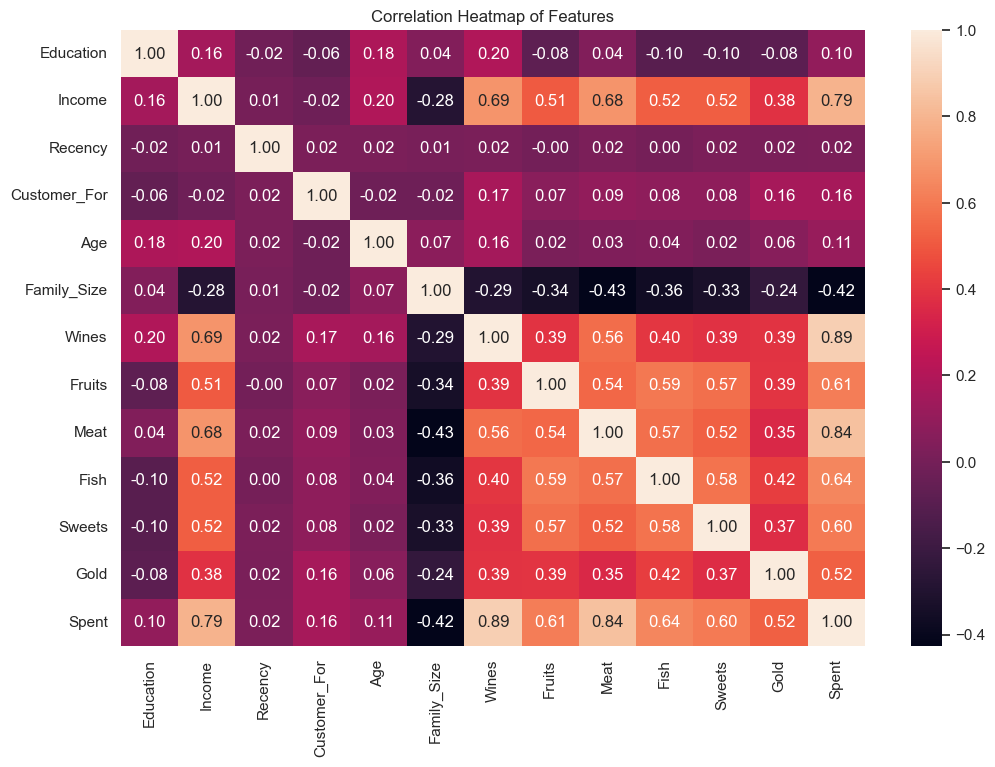

In [35]:
# Concatenating individual features to form a DataFrame
Cust_features_Spent = pd.concat([Customer_feature, Expenditure], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Spent .corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


#### Eval:
We see that income correlates with wine, meat and spent. We can infer that wealthier customers may be more likely to purchase goods like wine and meat and spend more money in general.

### 2. How Customer features interact with type of purchases
This tells us where our customer base prefers or likes to shop and we can direct our focus there

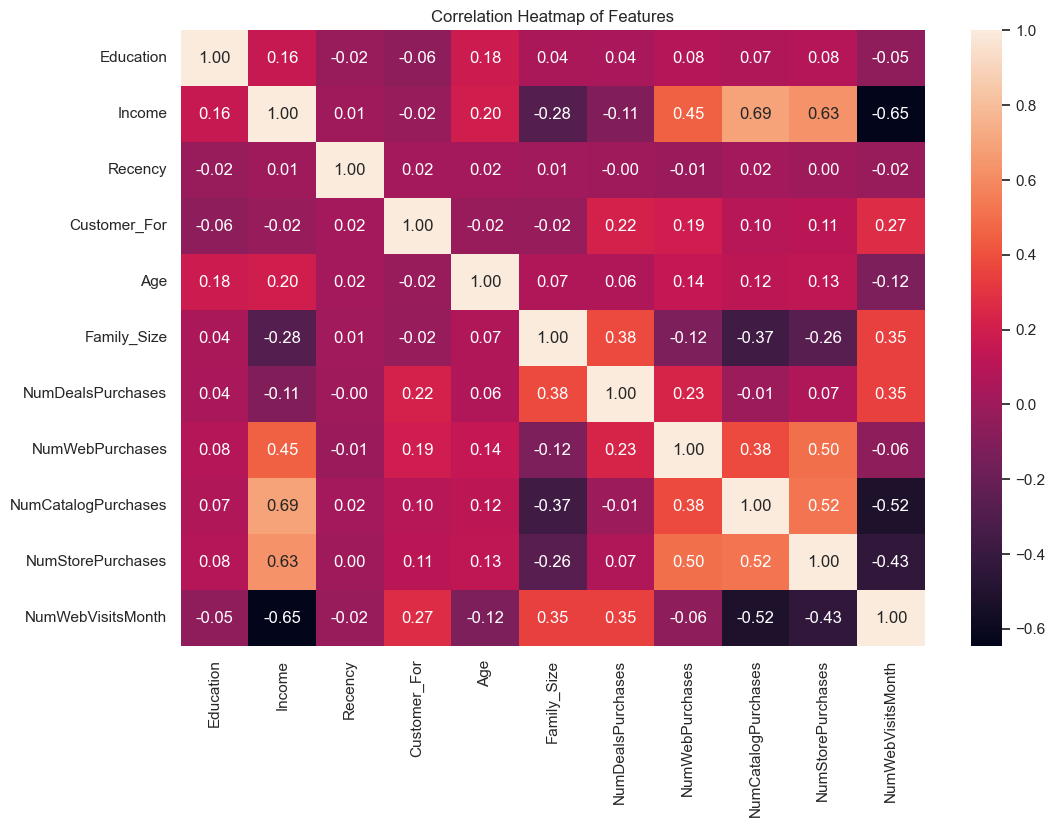

In [36]:
# Concatenating individual features to form a DataFrame
Cust_features_Purchase = pd.concat([Customer_feature, Type_of_purchases], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Purchase .corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


#### Eval:
We see that there isnt really any extremely strong correlation. The closest is the relationship between income and number of catalog purchases. 

### 3. How Customer features interact with Accept
This tells us which features make customers more likely to accept promotions

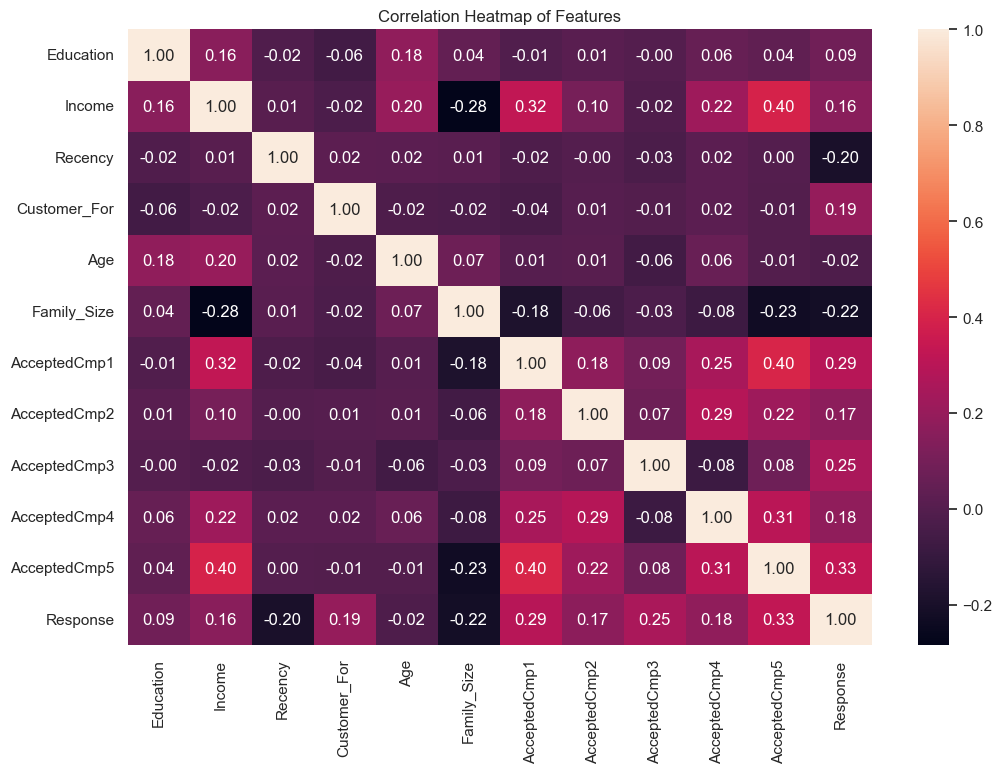

In [37]:
# Concatenating individual features to form a DataFrame
Cust_features_Accept= pd.concat([Customer_feature, Accept], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Accept.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Eval:
We see that there isnt really any strong correlation. Only income and acceptedcmp5 comes close but even then, relationship is not strong

### 4. How expenditure interact with type of purchases 
This tells us which item is typically purchased where

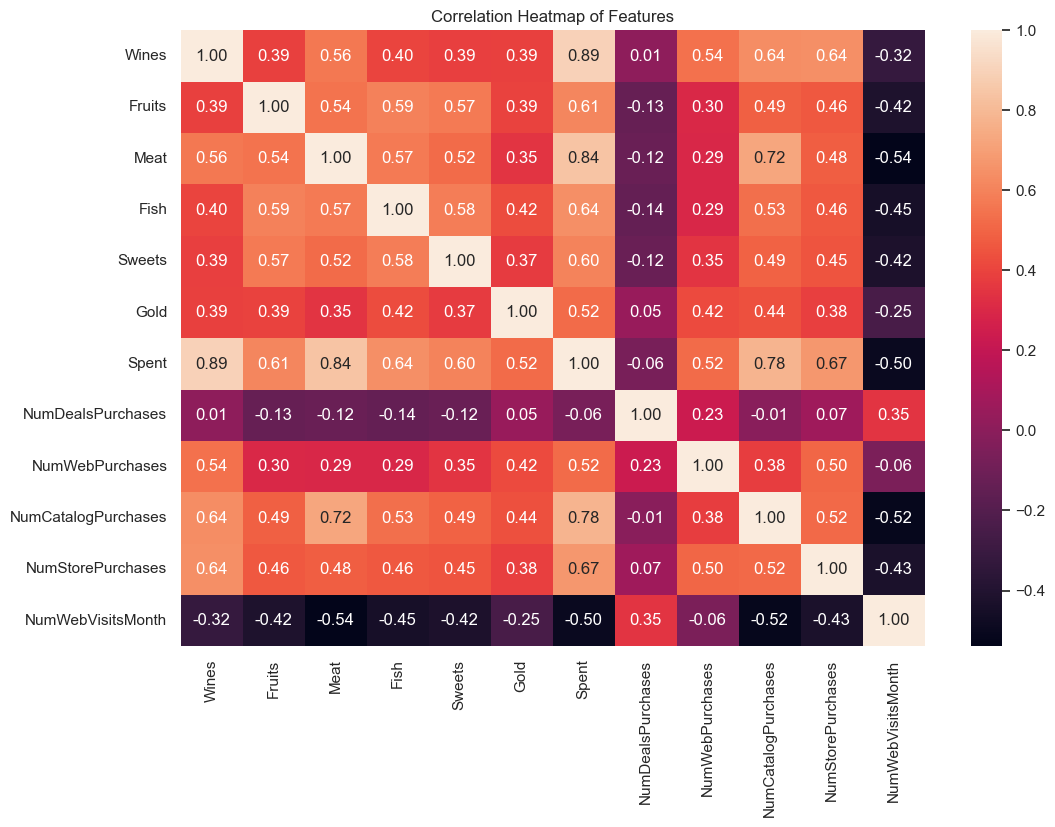

In [38]:
# Concatenating individual features to form a DataFrame
Cust_features_Buy = pd.concat([Expenditure,Type_of_purchases], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Buy .corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Eval: 
We see that spent and meat have a high correlation with number of catalog purchases, possibly showing that the product meat is highly likely to affect number of catalog purchases

### 5. How expenditure interact with accept 
This tells us which item is more likely to warrent an acceptance of promotion

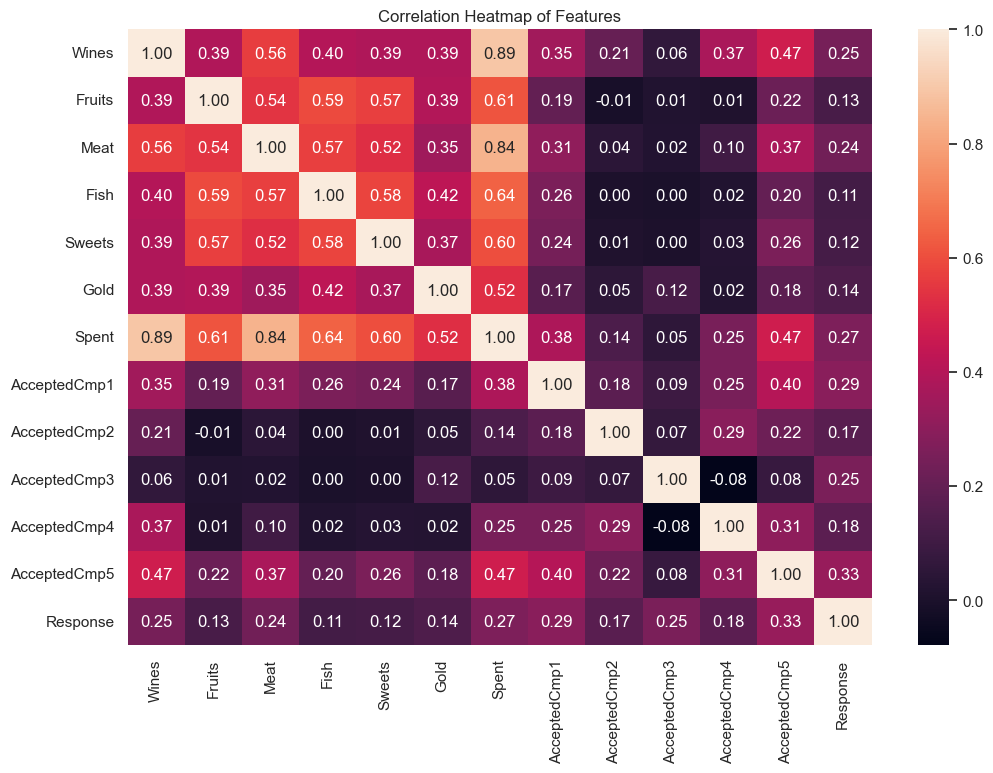

In [39]:
# Concatenating individual features to form a DataFrame
Cust_features_Expenses = pd.concat([Expenditure,Accept], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Expenses .corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Eval:
We see that there isnt really any extremely strong correlation. 

### 6. How type of purchases interact with acceptance
This tells us which mode of purchase is likely to warrent an acceptance of promotion

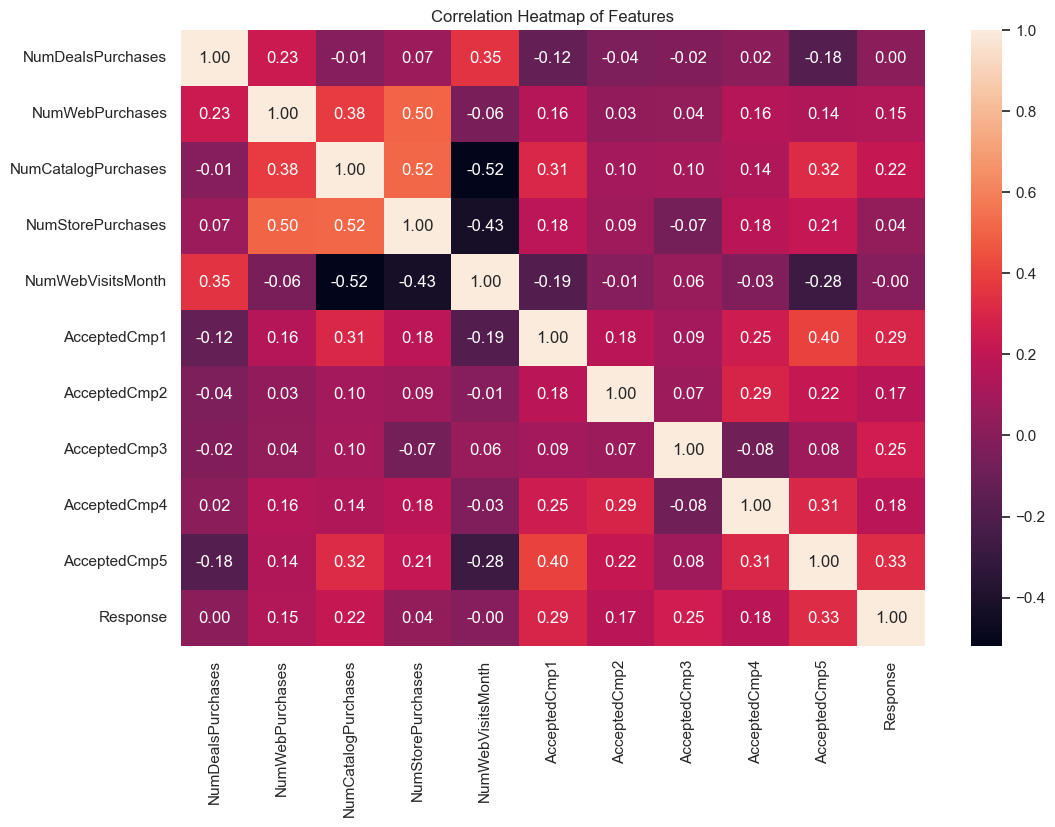

In [40]:
# Concatenating individual features to form a DataFrame
Cust_features_Buy = pd.concat([Type_of_purchases, Accept], axis=1)

# Calculating correlation matrix
corr_matrix = Cust_features_Buy .corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Eval:
We see that there isnt really any extremely strong correlation. 

### Overall, our key observations are that
1. Income correlates with wine, meat and spent, which suggests these products are pricier
2. Relationship between income and number of catalog purchases.
3. Spent and meat have a high correlation with number of catalog purchases

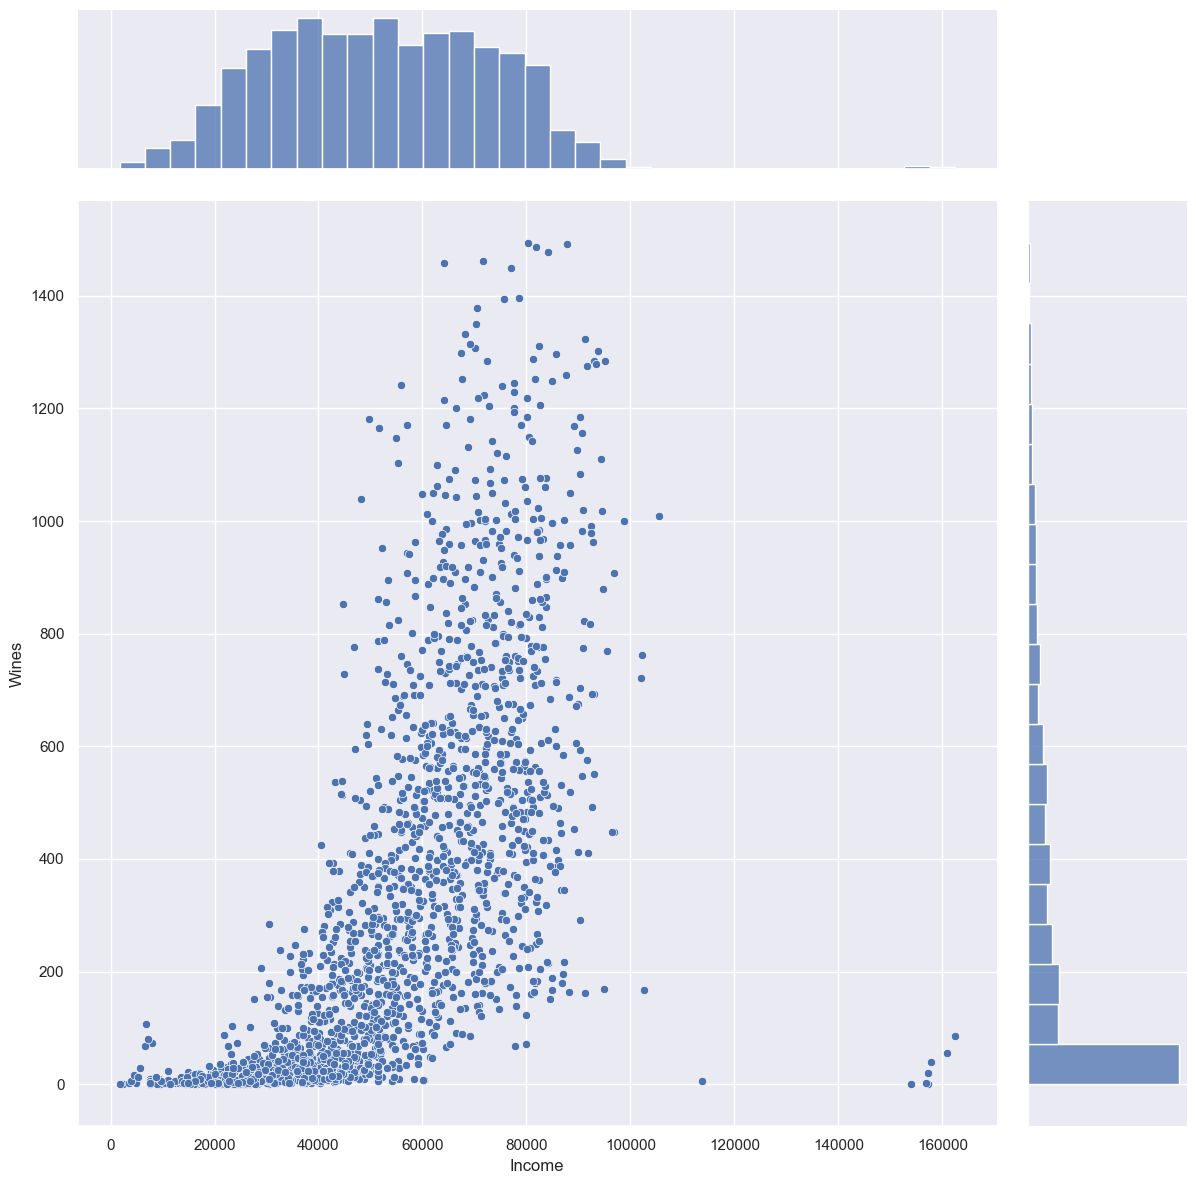

In [41]:
# 1. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Income", y = "Wines", height = 12)

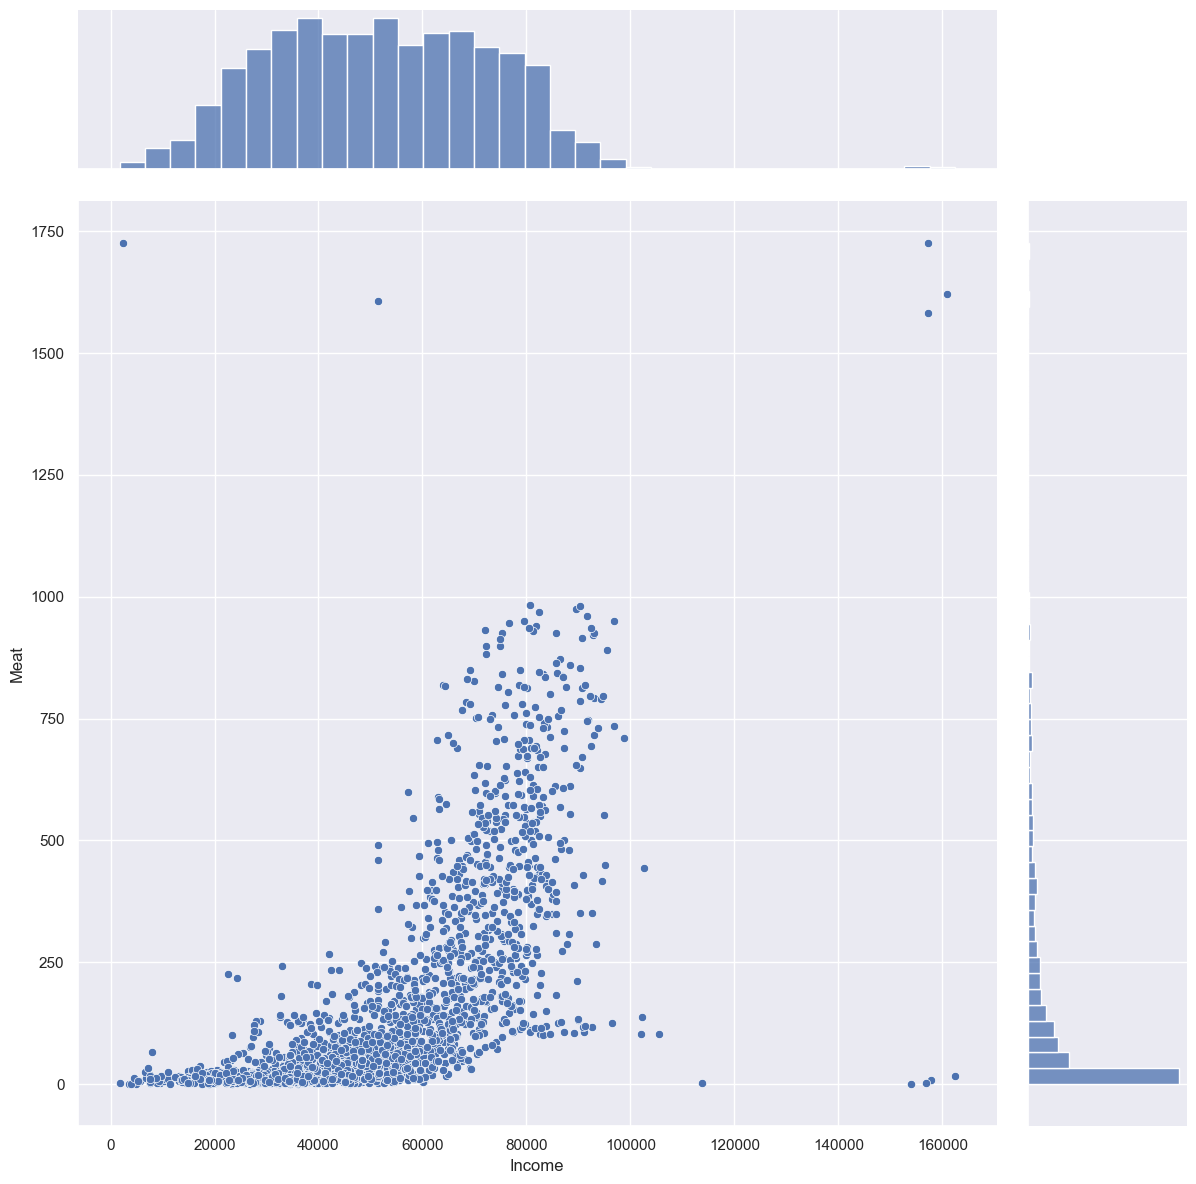

In [42]:
# 1. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Income", y = "Meat", height = 12)

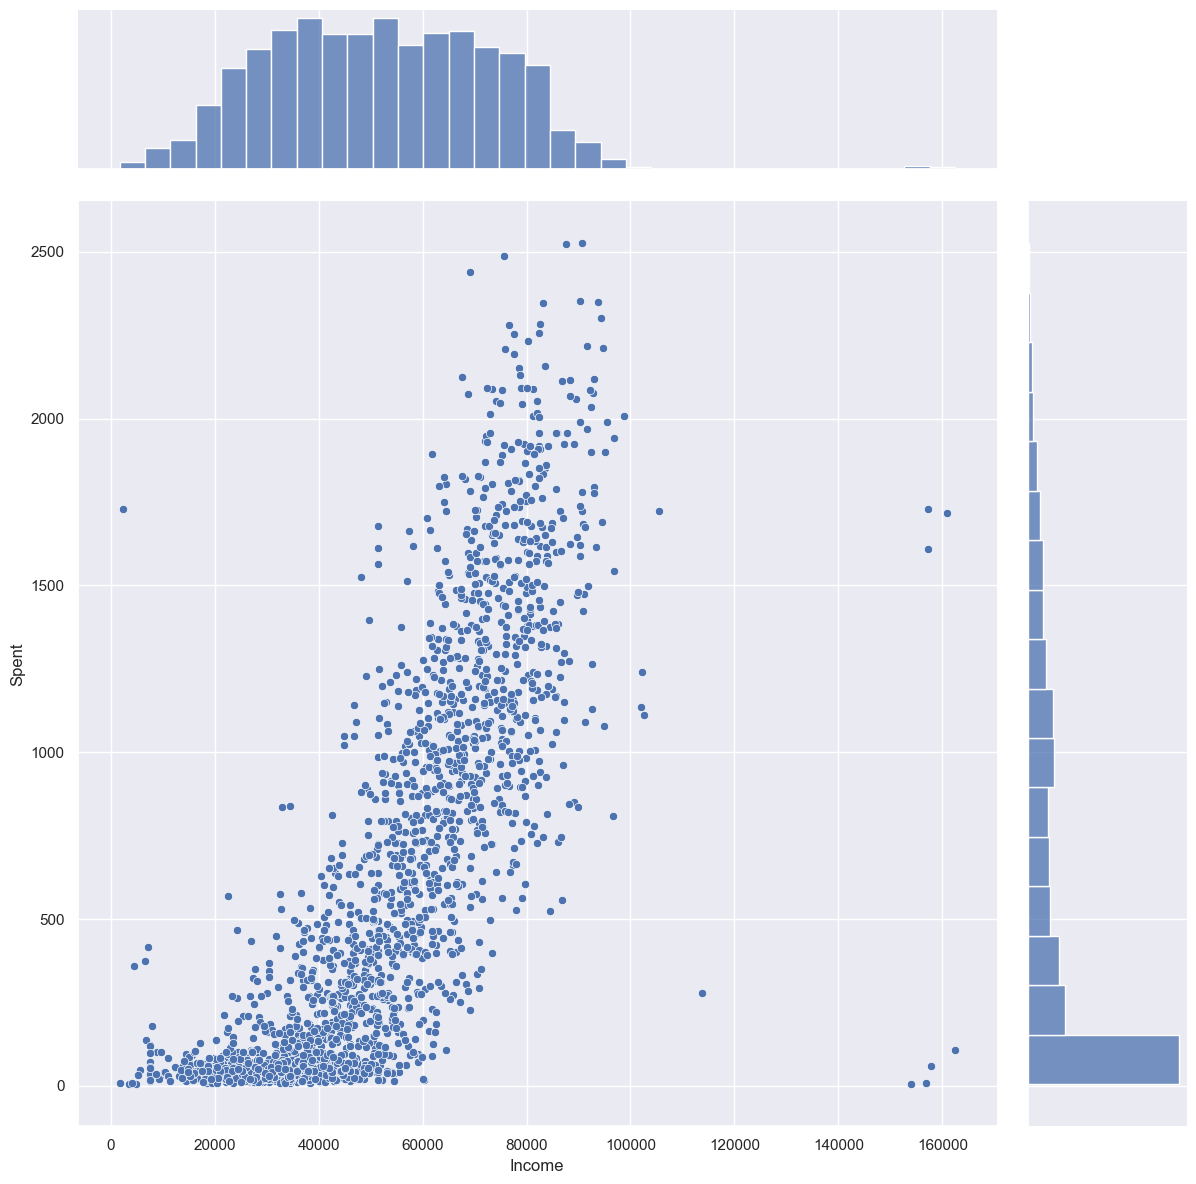

In [43]:
# 1. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Income", y = "Spent", height = 12)

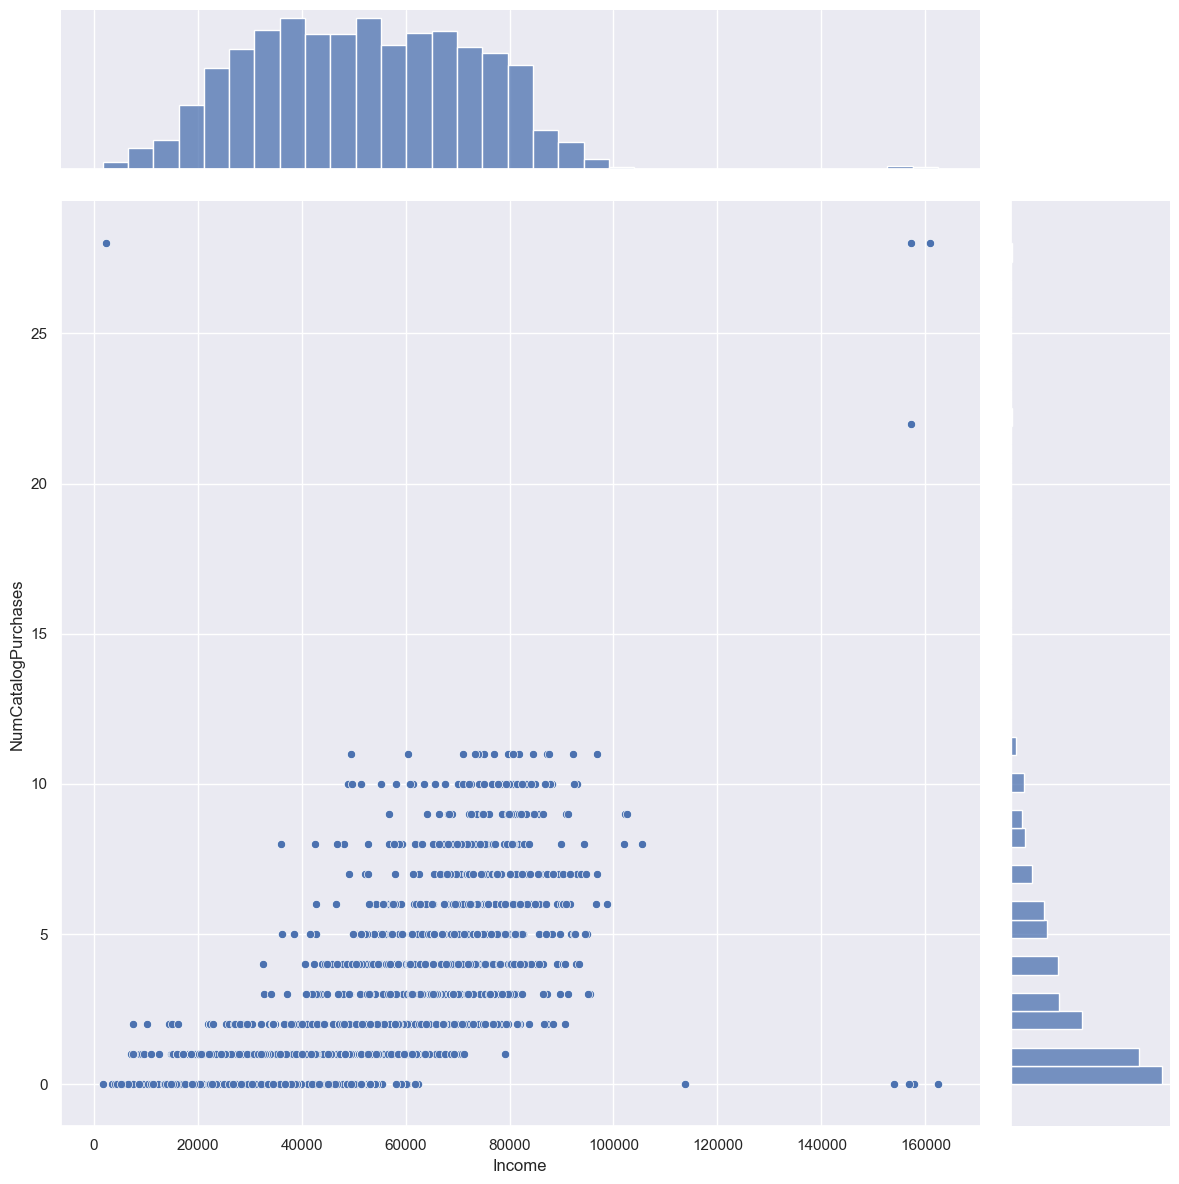

In [44]:
# 2. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Income", y = "NumCatalogPurchases", height = 12)

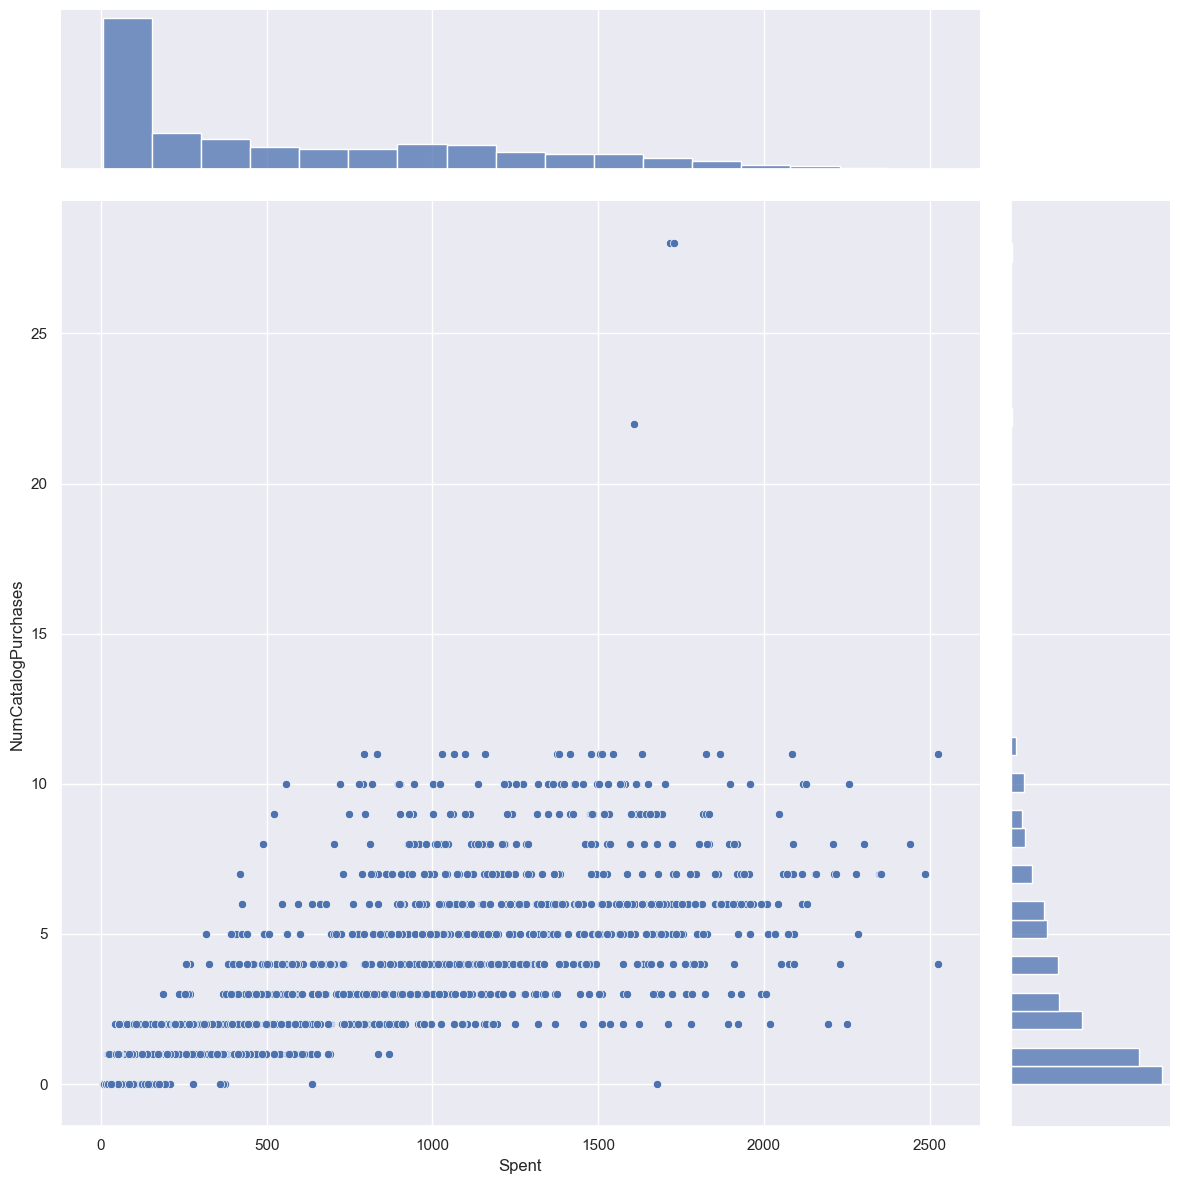

In [45]:
# 3. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Spent", y = "NumCatalogPurchases", height = 12)

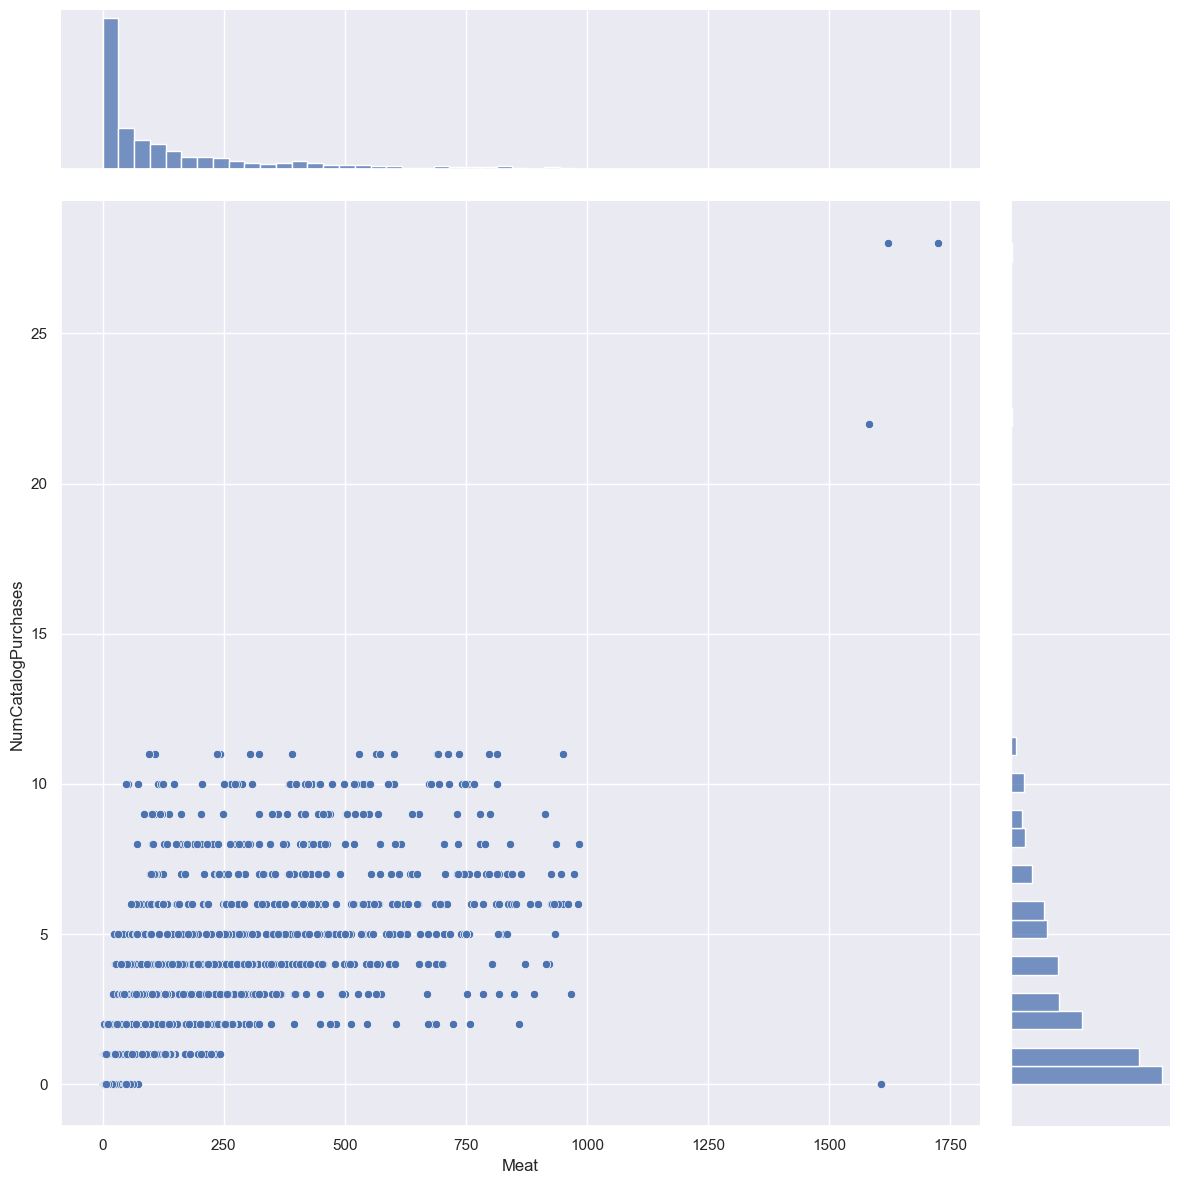

In [46]:
# 3. Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data=encoded_Pdata, x = "Meat", y = "NumCatalogPurchases", height = 12)

Overall, our key observations are that
1. We see that income correlates with wine, meat and spent, which suggests these products are pricier. We affirm this with the graph showing that theres an upward trend.
2. relationship between income and number of catalog purchases.We affirm this with the graph showing that theres an upward trend.
3.  We see that spent and meat have a high correlation with number of catalog purchases.We affirm this with the graph showing that theres an upward trend for spent and number of catalog purchases. However, this doesnt align necessariy with Meat as it seems to be influenced by a few outliers on the top right.

# 3. Machine learning algorithms


## a. REGRESSION (Model 1-3)


### i. Model 1: linear regression

In [47]:
# Selecting predictor variables: customer spending might be influenced by various factors, not just one.
X = PersonData[['Family_Size', 'Income', 'Age', 'Is_Parent']] 
y = PersonData['Spent']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 118869.16123721053
R2 Score: 0.6711388134203233


### Evaluation of model 1
MSE :is a measure of the average squared difference between the actual and predicted values. 
The lower the MSE, the better, as it indicates a closer fit of the model to the data. 
Compared to how much is typically spent in a market , the MSE value may be considered too high and that the difference may mean large inaccuracy in predicting the values.

R^2 (R-squared): measures the proportion of variance in the dependent variable that is predictable from the independent variables.
 An R^2 score of 0.6711 means that about 67.11% of the variance in Spent is explained by the model, which is quite good. 
This indicates that the model does a good job of capturing the relationships between the predictors and the target variable.


Overall
MSE value indicates that the current model may be lacking but the R^2 value indicates a passable model. Considering the discrepencies of the evaluative models and for a better gauge at goodness of fit of model, we compare it to other regressive models


### ii. Model 2:Logistics Regression

In [48]:
# Define a binary target variable based on whether spending is above the median
median_spent = PersonData['Spent'].median()
PersonData['High_Spender'] = (PersonData['Spent'] > median_spent).astype(int)  # 1 if high spender, 0 otherwise

# Selecting predictor variables
X = PersonData[['Family_Size', 'Income', 'Age', 'Is_Parent']]
y = PersonData['High_Spender']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting test set results
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # probabilities for AUC scoring

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8258928571428571
Confusion Matrix:
 [[158  39]
 [ 39 212]]
ROC AUC Score: 0.9097215200113253


### Evaluation:

1.Accuracy: This result indicates that the model correctly predicted whether a customer was a high spender or not about 83% of the time based on the This means that the above traits(Income, Family size, age, is parent) are a sufficient enough factor of expenditure. For many practical applications, this is considered quite good.

2.Confusion Matrix:The confusion matrix suggests that the model is more effective at identifying true high spenders than avoiding false identifications of high spenders because of lower false negatives compared to false positives.

3.ROC AUC Score: The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a performance metric commonly used to evaluate the quality of a binary classification model. It quantifies the ability of the model to discriminate between the positive and negative classes across various thresholds. A score close to 1, which is excellent.

Overall: Model performs well in terms of both accuracy and the ability to discriminate between classes, as shown by the high ROC AUC score.

Since it has performed well let's see what other insights can be gleamed

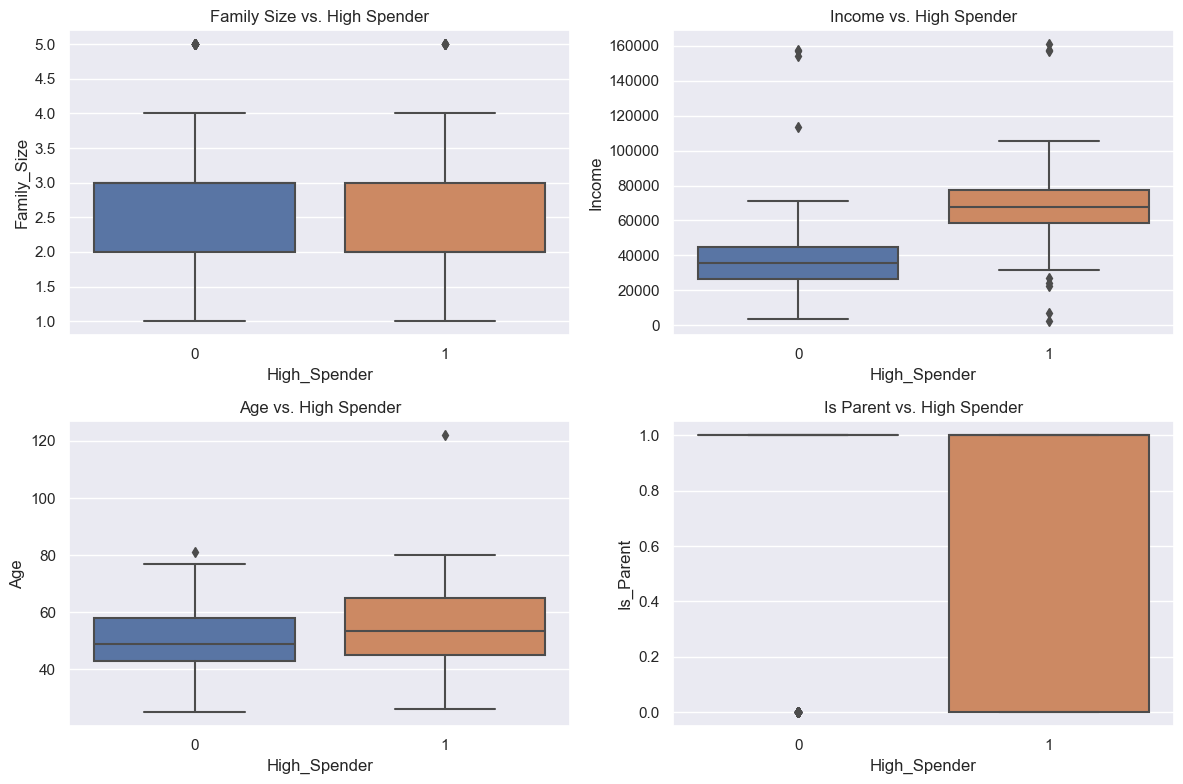

In [49]:
# Combine predictor variables and target variable into one DataFrame
data_for_plot = X_train.copy()
data_for_plot['High_Spender'] = y_train

# Plotting each predictor variable against the target variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sb.boxplot(x='High_Spender', y='Family_Size', data=data_for_plot, ax=axes[0, 0])
axes[0, 0].set_title('Family Size vs. High Spender')

sb.boxplot(x='High_Spender', y='Income', data=data_for_plot, ax=axes[0, 1])
axes[0, 1].set_title('Income vs. High Spender')

sb.boxplot(x='High_Spender', y='Age', data=data_for_plot, ax=axes[1, 0])
axes[1, 0].set_title('Age vs. High Spender')

sb.boxplot(x='High_Spender', y='Is_Parent', data=data_for_plot, ax=axes[1, 1])
axes[1, 1].set_title('Is Parent vs. High Spender')

plt.tight_layout()
plt.show()

### Evaluation & outcome of model 2 :
From the graph, we can see that high spenders, generally have higher median incomes and tend to be older than non-high spenders.

We also see that family size and is a parent are not particularly important factors in spending

### iii. Model 3: Gradient Boosting machines (Regressor)
This class is designed for regression tasks, where the target variable (y) represents continuous numerical values.
It's used when the goal is to predict a numerical value for each sample in the dataset.
Similar to the classifier version, the algorithm builds a sequence of decision trees to improve the predictive accuracy of the target variable.
The final prediction is typically obtained through averaging the predictions of the ensemble of trees.

### Customer Group features used
We use numerical values that have correlation value of above 0.3 at least and disregard x-values that are one hot encoded and hence consider
1. Age
2. Family size
3. Income 

Expenditure: NumWebPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.054044259811931394
Mean Squared Error (MSE) 	: 7.490085761507049

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.024192573385261262
Mean Squared Error (MSE) 	: 7.068676023663026



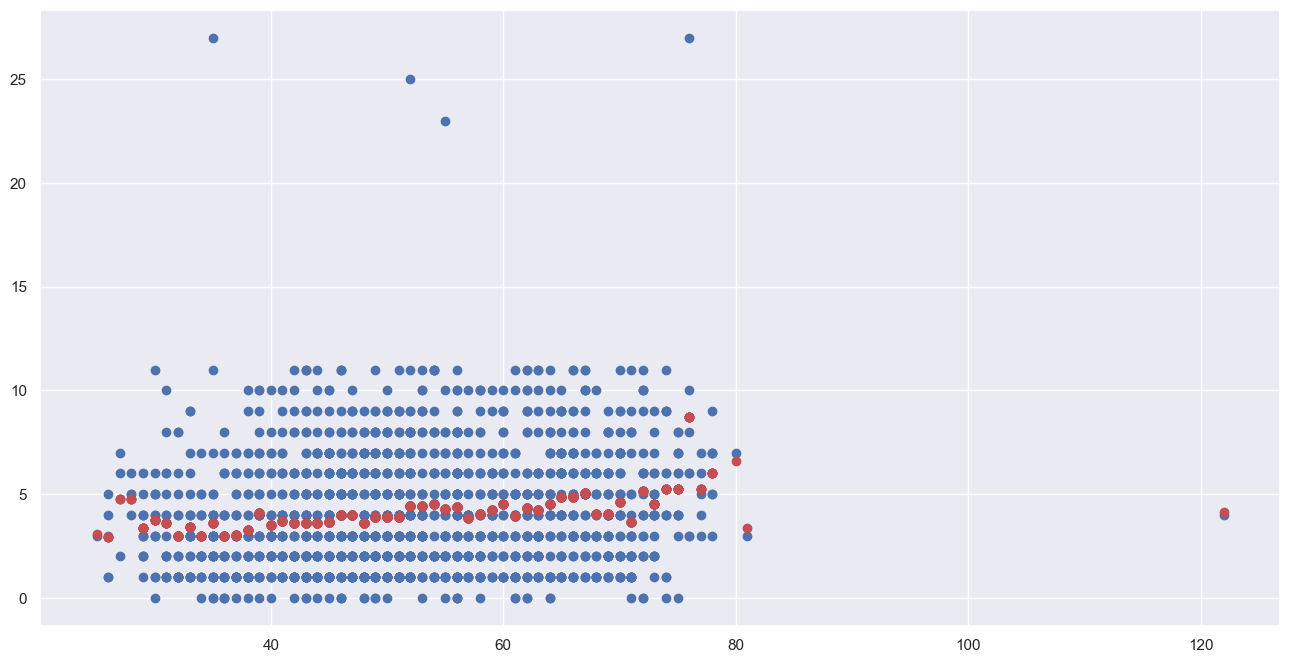

Expenditure: NumCatalogPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06556746895884003
Mean Squared Error (MSE) 	: 8.254652311540433

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.004530138498459513
Mean Squared Error (MSE) 	: 7.398720027583798



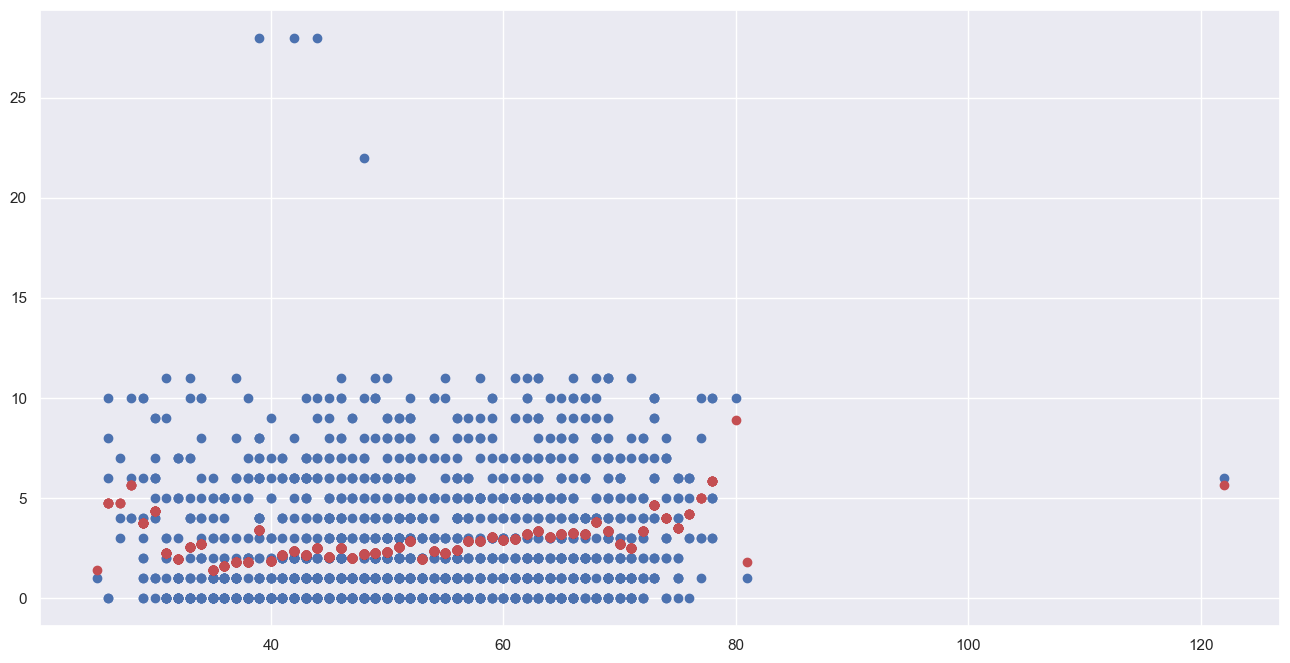

Expenditure: NumStorePurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05462294688665692
Mean Squared Error (MSE) 	: 9.879797201587316

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.020014384934367024
Mean Squared Error (MSE) 	: 11.046261190824497



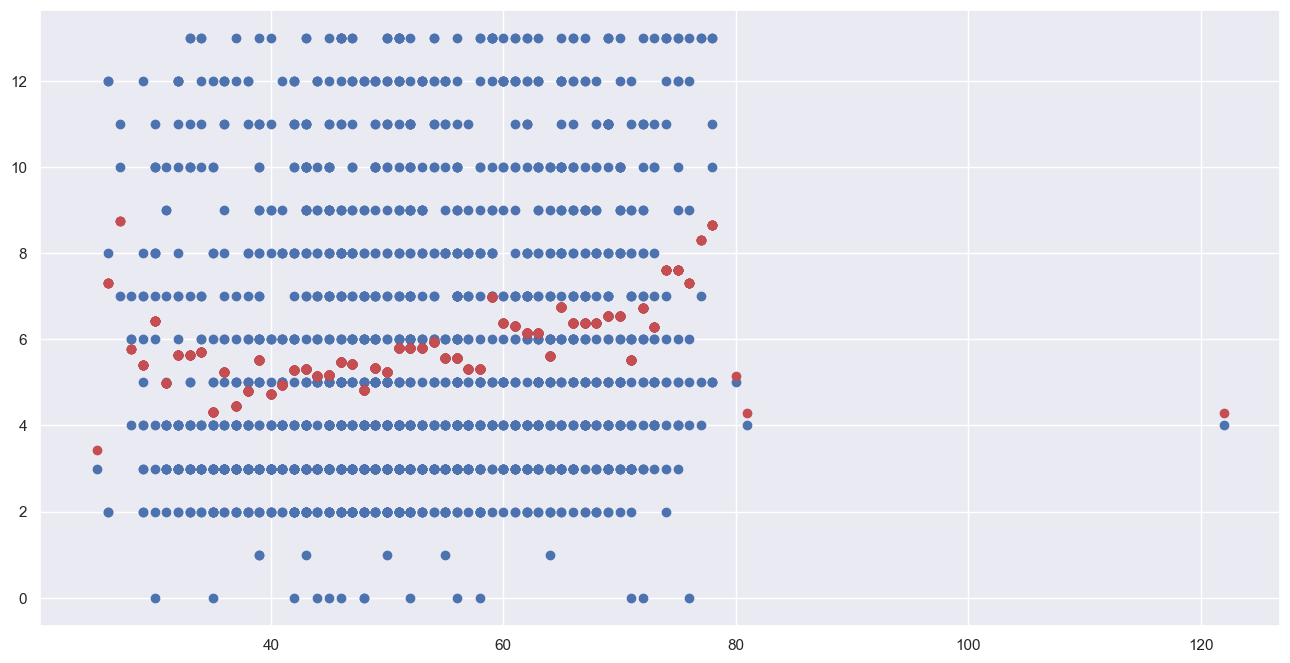

Expenditure: Spent
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06764471406345696
Mean Squared Error (MSE) 	: 337660.31726597506

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.03298242366701176
Mean Squared Error (MSE) 	: 373378.67551702994



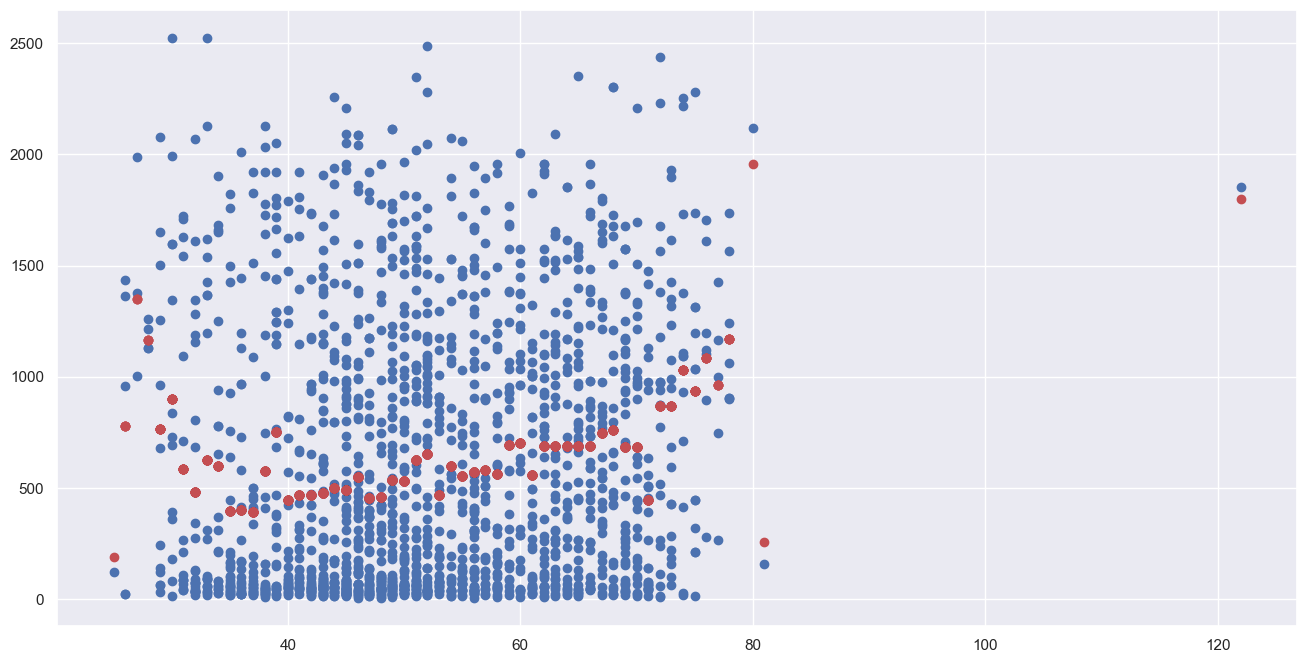

Expenditure: NumDealsPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.048778429487572494
Mean Squared Error (MSE) 	: 3.4256835913236747

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.01811685767641824
Mean Squared Error (MSE) 	: 4.17671653102031



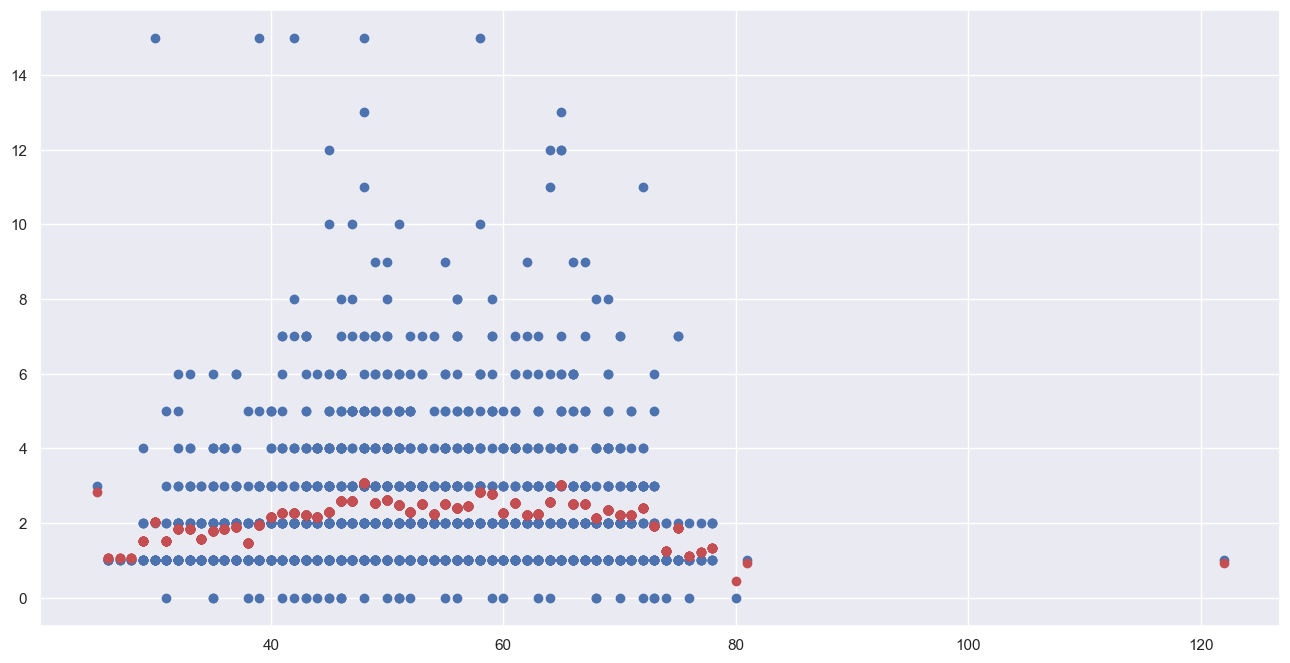

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Expenditure = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Spent","NumDealsPurchases"]

for exp in Expenditure:
    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(encoded_Pdata['Age'], encoded_Pdata[exp], test_size=0.2, random_state=42)
    # Reshape X_train and X_test
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    # Initialize the Gradient Boosting Regressor
    gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    # Train the model on the training data
    gbm_regressor.fit(X_train_reshaped, y_train)
    # Make predictions on the test data
    y_pred = gbm_regressor.predict(X_test_reshaped)
    # Check the Goodness of Fit (on Train Data)
    print("Expenditure:", exp)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_train, gbm_regressor.predict(X_train_reshaped)))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, gbm_regressor.predict(X_train_reshaped)))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
    print()

        
    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train_reshaped, y_train)
    plt.scatter(X_train_reshaped, gbm_regressor.predict(X_train_reshaped), color = "r") 
    plt.show()


### Evaluation of using age as an indicator
As expected from EDA, We see that age as a predictor is unhelpful and has a low R^2 value of less than 0.1. However, there are interesting results that could be glimpsed such as a slight curved trend for spent. This means companies may benefit from campaigns directed at younger below 40 or older consumers above 70 who are likely to spend more.


Expenditure: NumWebPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.020313910420289516
Mean Squared Error (MSE) 	: 7.757162960762445

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.009232127072122842
Mean Squared Error (MSE) 	: 6.837988568138629



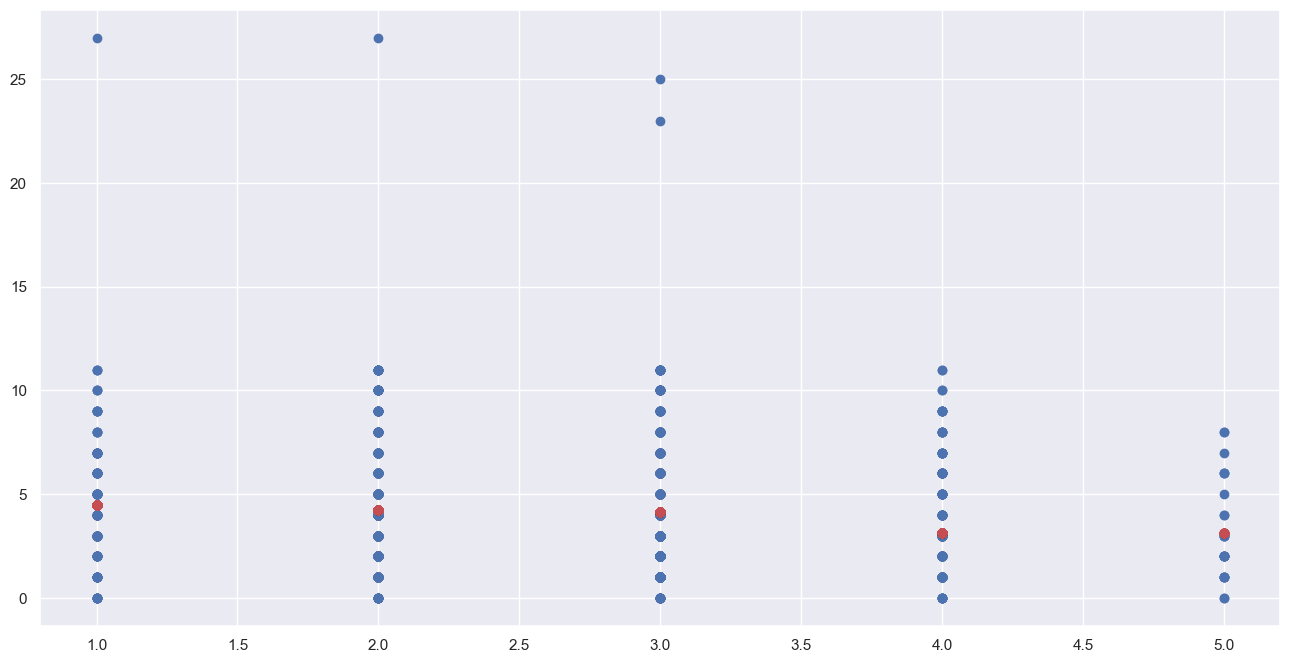

Expenditure: NumCatalogPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13340841489333854
Mean Squared Error (MSE) 	: 7.655354446181086

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.17608160699497177
Mean Squared Error (MSE) 	: 6.0684505937601685



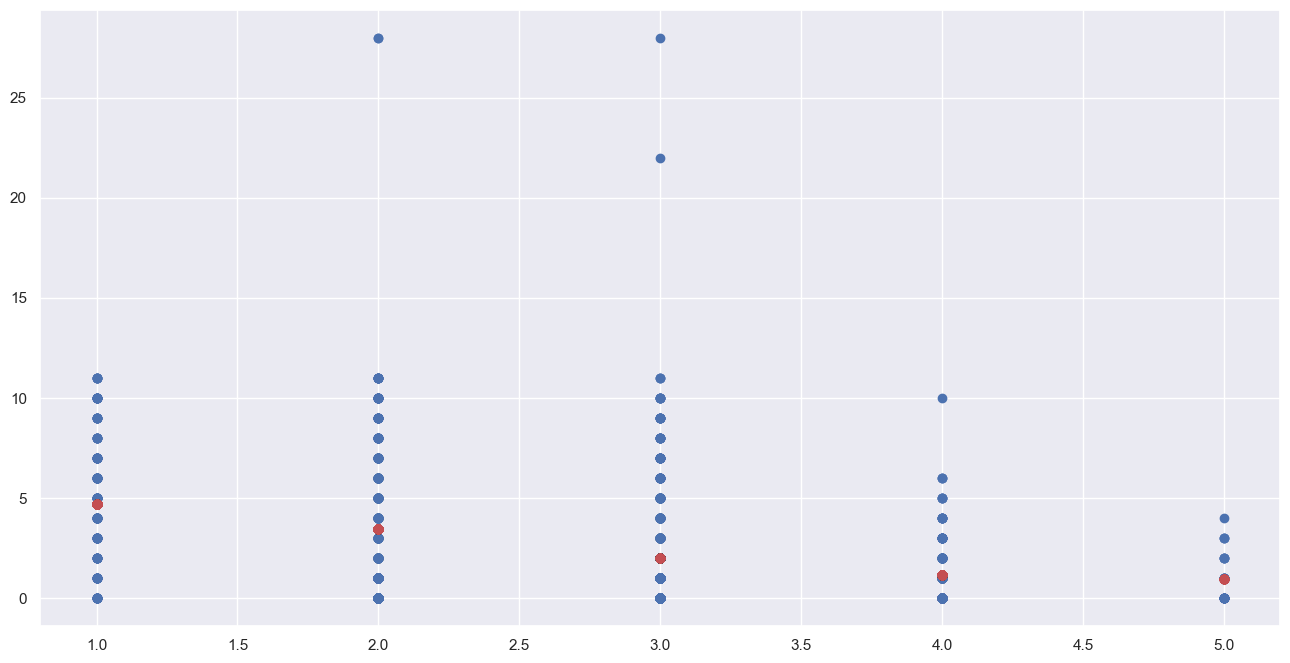

Expenditure: NumStorePurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06443395675240449
Mean Squared Error (MSE) 	: 9.777265849152705

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0677026117939643
Mean Squared Error (MSE) 	: 10.096328649629806



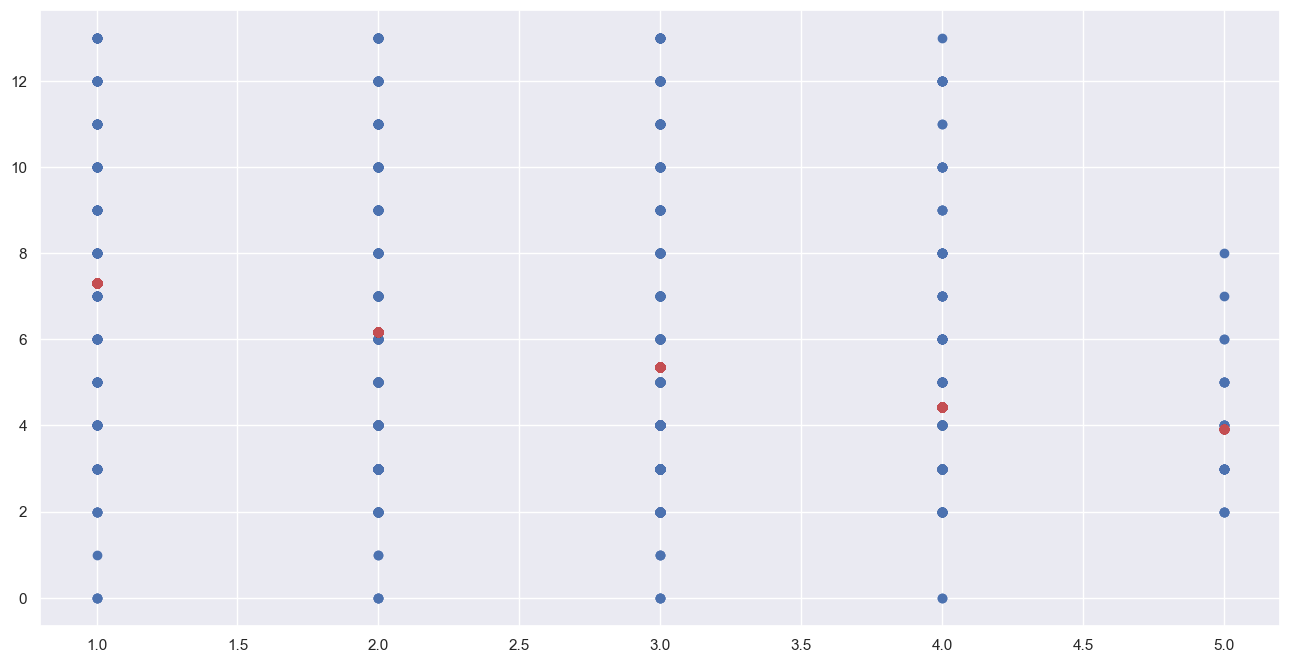

Expenditure: Spent
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19179040287210047
Mean Squared Error (MSE) 	: 292699.91075289116

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16790095823463536
Mean Squared Error (MSE) 	: 300767.98113410483



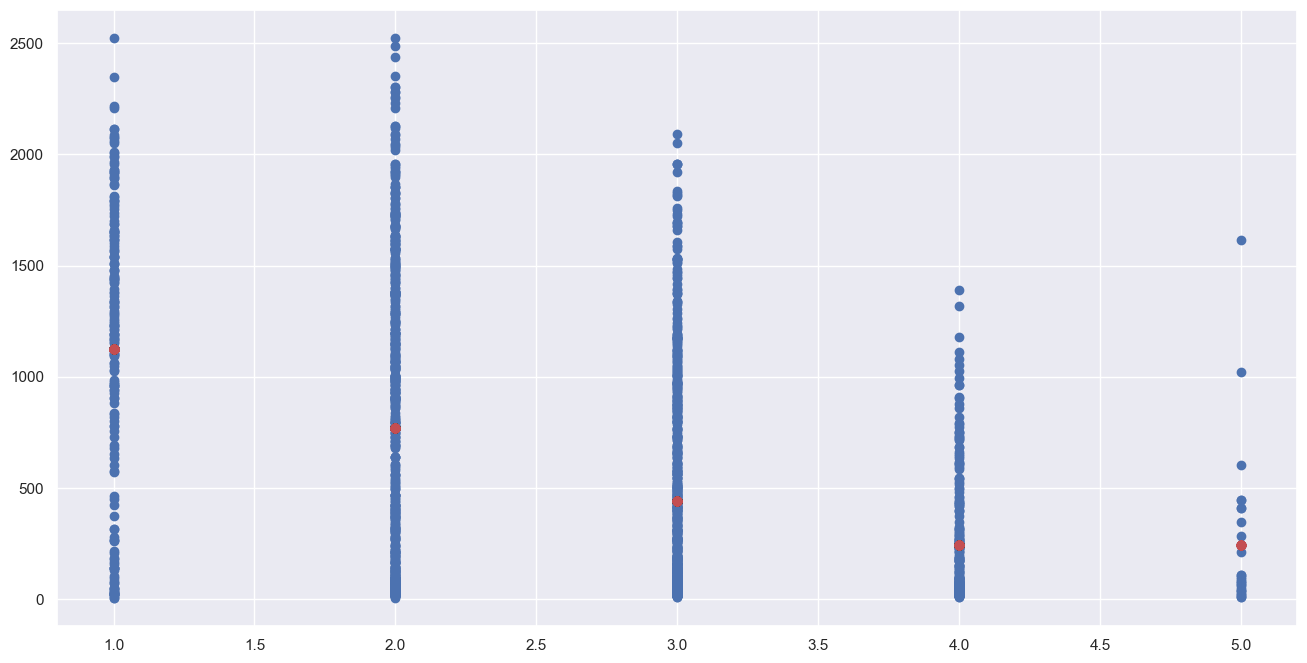

Expenditure: NumDealsPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1465697583914648
Mean Squared Error (MSE) 	: 3.07350260512155

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13966469460777398
Mean Squared Error (MSE) 	: 3.659678568010196



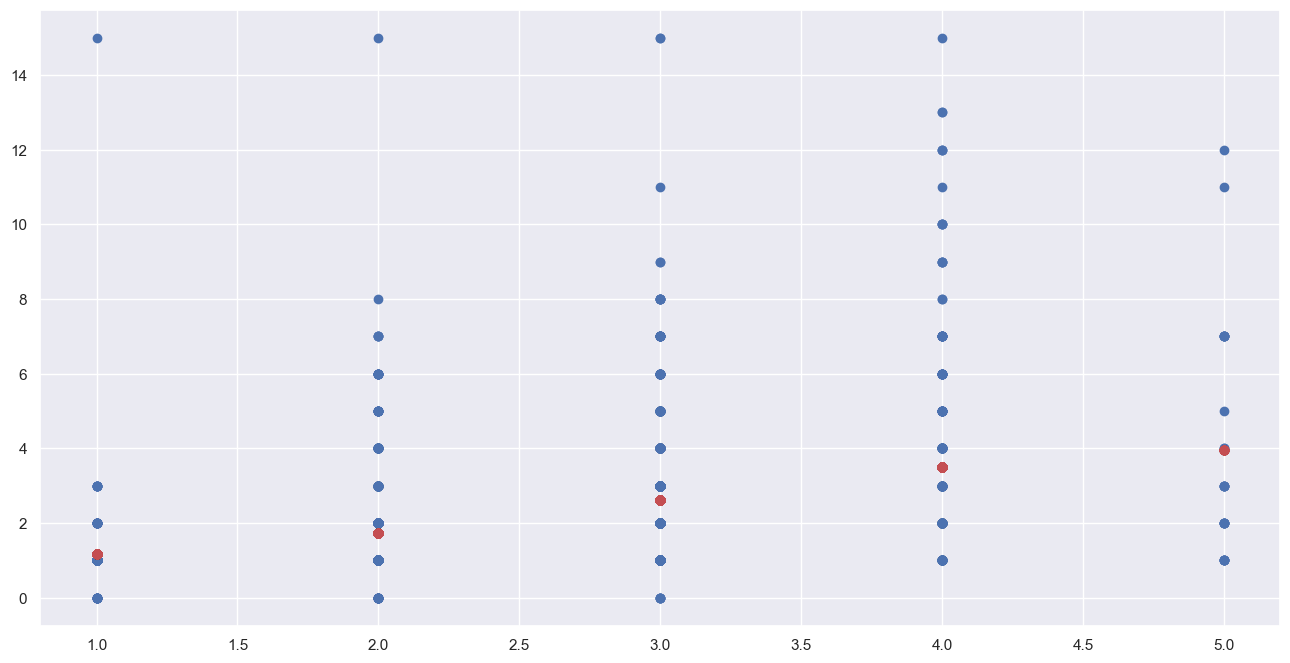

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Expenditure = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Spent","NumDealsPurchases"]

for exp in Expenditure:
    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(encoded_Pdata['Family_Size'], encoded_Pdata[exp], test_size=0.2, random_state=42)
    # Reshape X_train and X_test
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    # Initialize the Gradient Boosting Regressor
    gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    # Train the model on the training data
    gbm_regressor.fit(X_train_reshaped, y_train)
    # Make predictions on the test data
    y_pred = gbm_regressor.predict(X_test_reshaped)
    # Check the Goodness of Fit (on Train Data)
    print("Expenditure:", exp)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_train, gbm_regressor.predict(X_train_reshaped)))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, gbm_regressor.predict(X_train_reshaped)))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
    print()

        
    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train_reshaped, y_train)
    plt.scatter(X_train_reshaped, gbm_regressor.predict(X_train_reshaped), color = "r") 
    plt.show()

### Evaluation of using Family size as an indicatorSince R-squared value is consistently below 0.3, it can be stated that family size might not be a good indicator of deals purchased or amount purchased but would be better than age. However, some insights can indeed be gleamed from the tests, in that there is a decreasing trend for number of catalog, store purchases and spent, this may be because larger families may have other expenditures, draining income(School fees etc), hence they are less likely to splurge. This may be supported by the fact that the number of deals accepted is larger for larger families. This shows that deals may be more effectively directed towards couple who are more willing to splurge.



Expenditure: NumWebPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47165494848943856
Mean Squared Error (MSE) 	: 4.183440703785138

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33607278611660363
Mean Squared Error (MSE) 	: 4.582230432234937



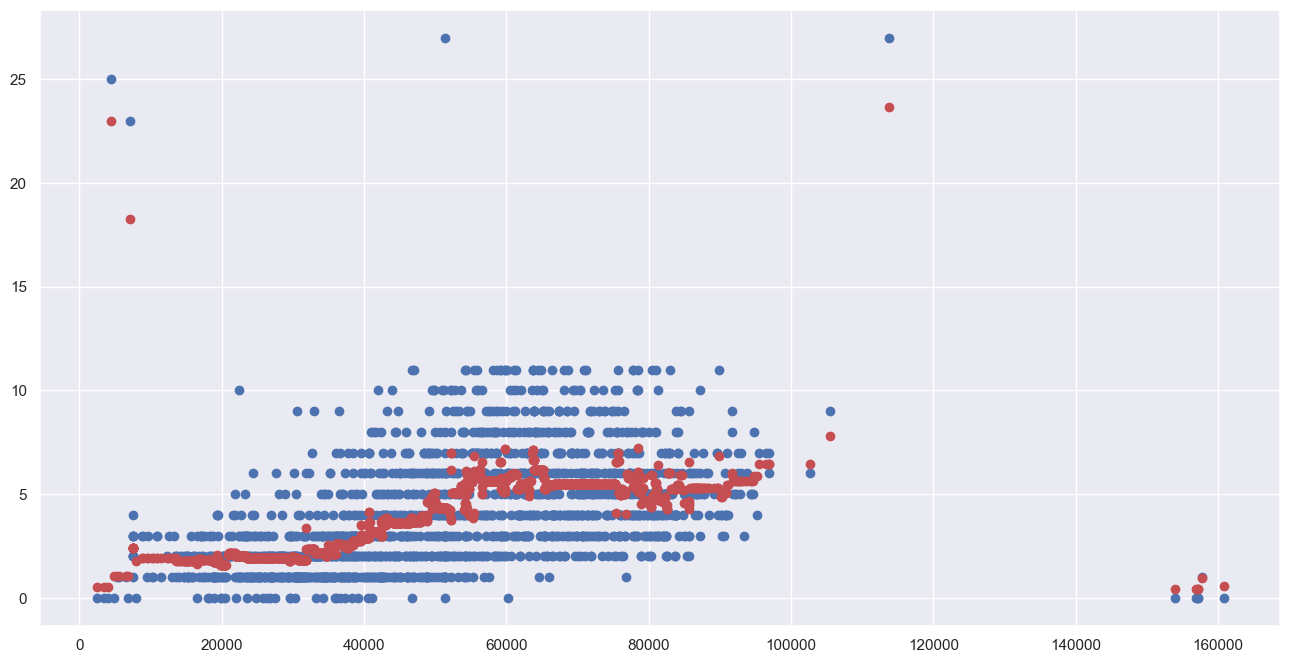

Expenditure: NumCatalogPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6992474892903866
Mean Squared Error (MSE) 	: 2.6568075545963037

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1476374106829741
Mean Squared Error (MSE) 	: 6.277952167537415



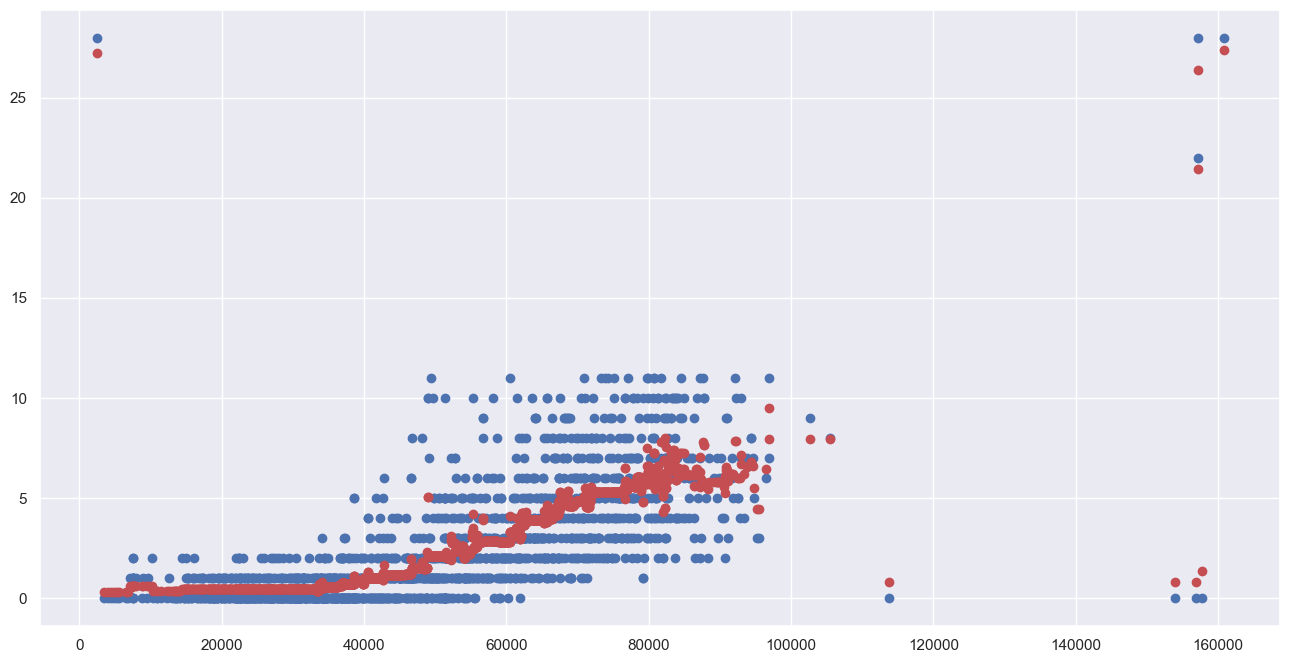

Expenditure: NumStorePurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6182404312200309
Mean Squared Error (MSE) 	: 3.989632609433902

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5134361728200149
Mean Squared Error (MSE) 	: 5.2692503168797415



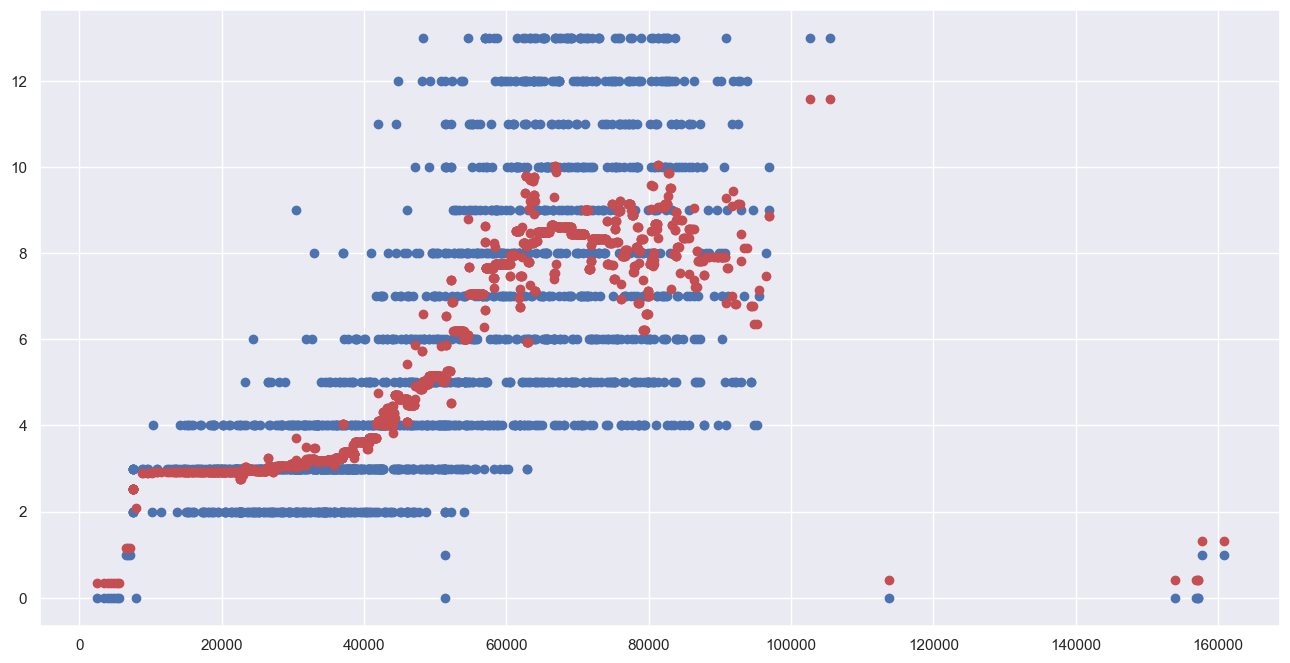

Expenditure: Spent
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7886711168614421
Mean Squared Error (MSE) 	: 76534.53442520225

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7201933558320437
Mean Squared Error (MSE) 	: 101138.05598881537



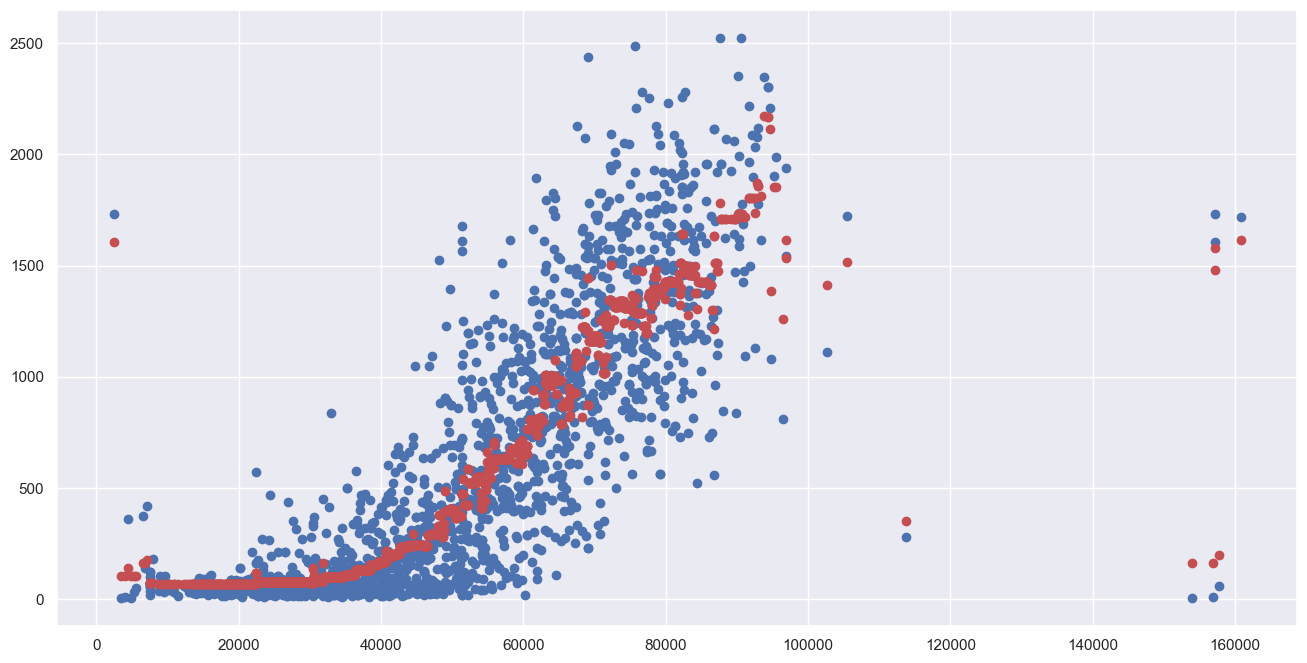

Expenditure: NumDealsPurchases
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3592335077919474
Mean Squared Error (MSE) 	: 2.307625611396369

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11045626351609461
Mean Squared Error (MSE) 	: 3.783924857336529



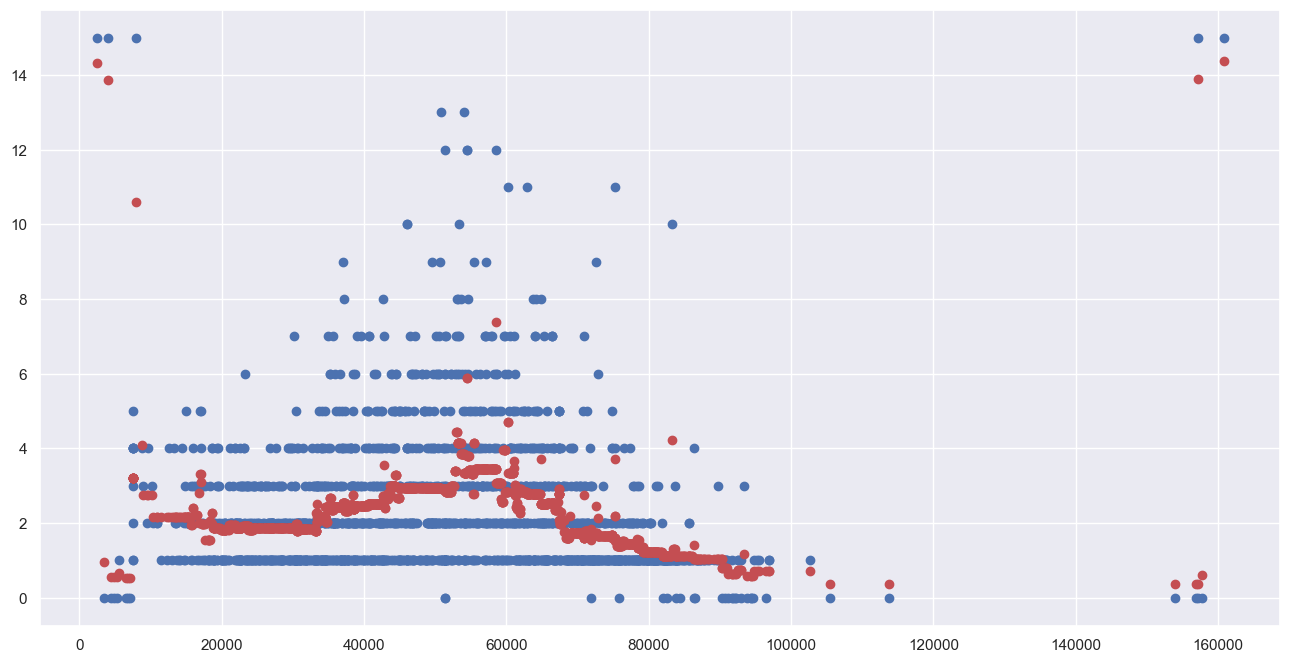

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Expenditure = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Spent","NumDealsPurchases"]

for exp in Expenditure:
    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(encoded_Pdata['Income'], encoded_Pdata[exp], test_size=0.2, random_state=42)
    # Reshape X_train and X_test
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    # Initialize the Gradient Boosting Regressor
    gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    # Train the model on the training data
    gbm_regressor.fit(X_train_reshaped, y_train)
    # Make predictions on the test data
    y_pred = gbm_regressor.predict(X_test_reshaped)
    # Check the Goodness of Fit (on Train Data)
    print("Expenditure:", exp)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_train, gbm_regressor.predict(X_train_reshaped)))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, gbm_regressor.predict(X_train_reshaped)))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
    print()
    
    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train_reshaped, y_train)
    plt.scatter(X_train_reshaped, gbm_regressor.predict(X_train_reshaped), color = "r") 
    plt.show()



### Evaluation of using income as an indicator
The closer the R-squared value is to 1, the better the model fits the data. Since R-squared value is quite high, it can be stated that income is likely to be a good indicator of deals purchased or amount purchased. There is a general upward trend for most factors, showing that a higher income does indeed lead to more purchases. This could be because they are no longer concerned about the price. This means advertisements aimed at higher income individuals may be beneficial as they are less likely to look at cost of product but its quality. However, we see for the number of deals purchased, the number declines after a point. This could be because people of high income, dont require deals as much so we can redirect and target lower income individuals instead.


### Evaluation of model 3

We see that income may be a better indicator in predicting expected expenditure.

### b. Heuristic Optimisation algorithm

#### Hill climbing (Model 4)
Qn: How do we maximize Company Profits based on customer features? 

In [53]:
# Selecting the columns
thedata = PersonData[['Family_Size', 'Income','Spent']]

# Converting the selected DataFrame to a NumPy array
thearray = thedata.to_numpy()

# Output the shape of the array to confirm its dimensions
print("Shape of the array:", thearray.shape)
print("First 5 rows of the array:\n",thearray[:5])

Shape of the array: (2239, 3)
First 5 rows of the array:
 [[1.0000e+00 5.8138e+04 1.6170e+03]
 [3.0000e+00 4.6344e+04 2.7000e+01]
 [2.0000e+00 7.1613e+04 7.7600e+02]
 [3.0000e+00 2.6646e+04 5.3000e+01]
 [3.0000e+00 5.8293e+04 4.2200e+02]]


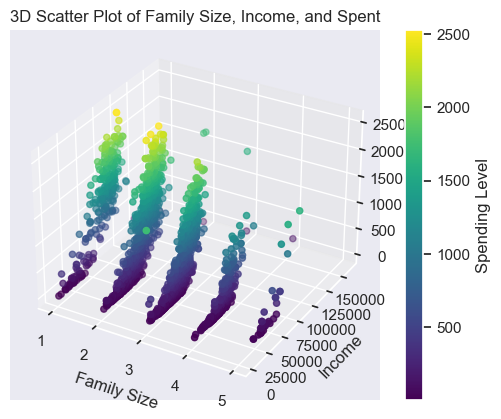

In [54]:
#visualise the three column
data_array = thearray
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
family_sizes = data_array[:, 0]  # Family_Size
incomes = data_array[:, 1]       # Income
spendings = data_array[:, 2]     # Spent
scatter = ax.scatter(family_sizes, incomes, spendings, c=spendings, cmap='viridis', marker='o')
ax.set_xlabel('Family Size')
ax.set_ylabel('Income')
ax.set_zlabel('Spent')
ax.set_title('3D Scatter Plot of Family Size, Income, and Spent')
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('Spending Level')
plt.show()

Optimal index: 861
Optimal spending amount: 292.0
Corresponding family size and income: 4.0 44602.0


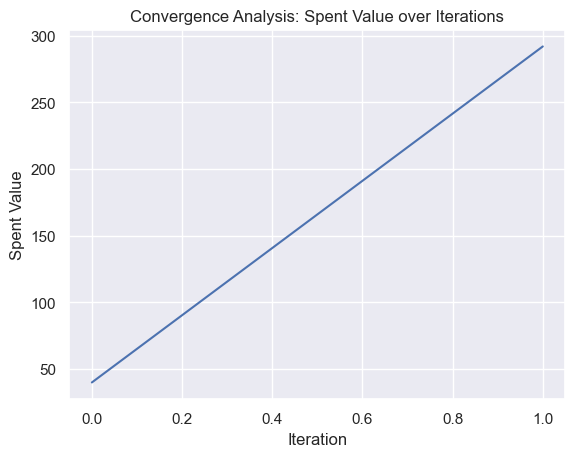

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def hill_climb_spending(data, start_index, max_iter=100):
    current_index = start_index
    current_value = data[current_index, 2]  # Spent is now at index 2
    iter_count = 0
    spent_history = [current_value]  # List to store the history of spent values

    while iter_count < max_iter:
        # Try moving to the next index
        next_index = current_index + 1 if current_index + 1 < len(data) else current_index
        next_value = data[next_index, 2]

        if next_value > current_value:
            current_index = next_index
            current_value = next_value
        else:
            # Try moving to the previous index
            prev_index = current_index - 1 if current_index - 1 >= 0 else current_index
            prev_value = data[prev_index, 2]
            if prev_value > current_value:
                current_index = prev_index
                current_value = prev_value
            else:
                # No improvement found, stop the iteration
                break
        
        iter_count += 1
        spent_history.append(current_value)  # Append the current spent value to the history list

    return current_index, current_value, spent_history

# Perform hill climbing starting at a random index in the dataset
start_idx = np.random.randint(0, len(thearray))
optimal_index, optimal_spent, spent_history = hill_climb_spending(thearray, start_idx)

print("Optimal index:", optimal_index)
print("Optimal spending amount:", optimal_spent)
print("Corresponding family size and income:", thearray[optimal_index, 0], thearray[optimal_index, 1])

# Plot convergence analysis
plt.plot(np.arange(len(spent_history)), spent_history)
plt.xlabel('Iteration')
plt.ylabel('Spent Value')
plt.title('Convergence Analysis: Spent Value over Iterations')
plt.show()


### Evaluation of model 4
The best result was found at index 861 within the dataset. At this index, the highest observed spending amount was $292. The associated family size at this index is 4, and the income is $44,602.

## c. Clustering (Model 5-7)

### Data Preprocessing for clustering model

#### Standard scaling

Since we are going to be doing clustering, we do standard scaling now, to make the data easier to deal with.

In [56]:
#Creating a copy of data
DataCopy = encoded_Pdata.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
DataCopy  = DataCopy .drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(DataCopy )
scaled_Person = pd.DataFrame(scaler.transform(DataCopy ),columns= DataCopy .columns )
print("All features are now scaled")

All features are now scaled


In [57]:
scaled_Person.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.410120  0.288446 -0.824769 -0.930282  0.306624  0.983339  1.551126   
1  -0.410120 -0.262524  1.033035  0.906491 -0.384051 -0.870826 -0.636311   
2  -0.410120  0.917946 -0.824769 -0.930282 -0.798456  0.362313  0.570551   
3  -0.410120 -1.182738  1.033035 -0.930282 -0.798456 -0.870826 -0.560882   
4   1.122865  0.295687  1.033035 -0.930282  1.549838 -0.389456  0.419693   

       Meat      Fish    Sweets  ...  NumStorePurchases  NumWebVisitsMonth  \
0  1.679196  2.461517  1.476020  ...          -0.551136           0.693887   
1 -0.713430 -0.650588 -0.631700  ...          -1.166440          -0.130311   
2 -0.177305  1.344820 -0.147167  ...           1.294778          -0.542410   
3 -0.651399 -0.504136 -0.583247  ...          -0.551136           0.281788   
4 -0.217182  0.154898 -0.001807  ...           0.064169          -0.130311   

   Customer_For  Living_With       Age     Spent  Children  Family_Size  \
0      1.530940    -1.346408  0.984922  1.678944 -1.264195    -1.758601   
1     -1.190204    -1.346408  1.235281 -0.961639  1.396080     0.446668   
2     -0.205644     0.742717  0.317300  0.282258 -1.264195    -0.655966   
3     -1.061568     0.742717 -1.268304 -0.918460  0.065942     0.446668   
4     -0.952722     0.742717 -1.017946 -0.305645  0.065942     0.446668   

   Is_Parent  Accepted  
0  -1.584110 -0.439154  
1   0.631269 -0.439154  
2  -1.584110 -0.439154  
3   0.631269 -0.439154  
4   0.631269 -0.439154  

[5 rows x 24 columns]

#### Using PCA and KElbow visualiser

We have 24 features on the data, however,the higher the number of features, the harder it is to work with. As shown in the confusion matrix, most of these features are actually correlated(most have scores above 0.5), and hence redundant. This is why we will do dimensionality reduction on the selected features. To do this, we use Principal component analysis (PCA).

In [58]:

# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
Pca_2dPpl = pca_2d.fit_transform(scaled_Person)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
Pca_3dPpl = pca_3d.fit_transform(scaled_Person)

# Evaluate explained variance ratio
print("Explained Variance Ratio (2D):", pca_2d.explained_variance_ratio_)
print("Explained Variance Ratio (3D):", pca_3d.explained_variance_ratio_)


Explained Variance Ratio (2D): [0.35054662 0.12243426]
Explained Variance Ratio (3D): [0.35054662 0.12243426 0.06558405]


We see that although having a third dimension does not increase variance by alot, however, 55.4% is better than 48.62%. Hence we use 3-components

In [59]:
#Initiating PCA to reduce dimentions to 3(So we can do 3d-graph)
pca_3d.fit(scaled_Person)
PCA_People = pd.DataFrame(pca_3d.transform(scaled_Person), columns=(["col1","col2", "col3"]))
PCA_People.describe().T


count          mean       std       min       25%       50%       75%  \
col1  2239.0  1.650211e-16  2.901186 -5.940829 -2.544037 -0.810644  2.350725   
col2  2239.0  0.000000e+00  1.714566 -4.262034 -1.331263 -0.150224  1.235552   
col3  2239.0 -3.014808e-17  1.254890 -3.921957 -0.836129 -0.006928  0.824283   

           max  
col1  7.850326  
col2  6.266999  
col3  5.797039

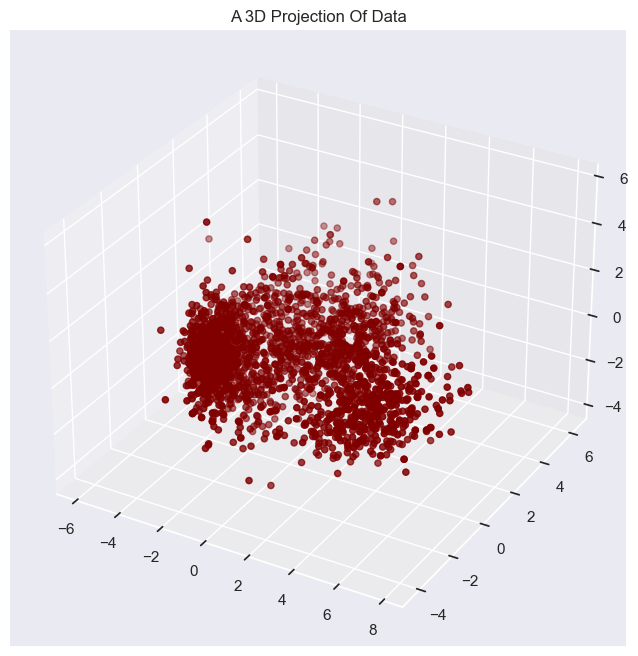

In [60]:

x =PCA_People["col1"]
y =PCA_People["col2"]
z =PCA_People["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data")
plt.show()

In [61]:

from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


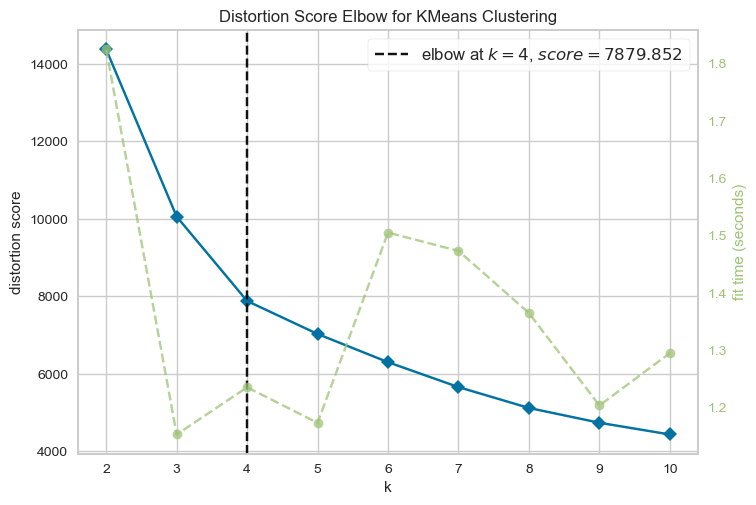

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_People)
Elbow_M.show()

#### Insights
Hence, we can see from the KElbow visualiser that 4 will be an optimal number for clustering

### i. Model 5: Agglomerative clustering 

In [63]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
Data_AC = AC.fit_predict(PCA_People)
PCA_People["Clusters"] = Data_AC
#Adding the Clusters feature to the orignal dataframe.
encoded_Pdata["Clusters"]= Data_AC

In [64]:
encoded_Pdata.describe()

Education         Income      Kidhome     Teenhome      Recency  \
count  2239.000000    2239.000000  2239.000000  2239.000000  2239.000000   
mean      1.267530   51963.554712     0.443948     0.506476    49.121036   
std       0.652468   21410.672116     0.538390     0.544555    28.963662   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       1.000000   35533.500000     0.000000     0.000000    24.000000   
50%       1.000000   51381.500000     0.000000     0.000000    49.000000   
75%       2.000000   68277.500000     1.000000     1.000000    74.000000   
max       2.000000  162397.000000     2.000000     2.000000    99.000000   

             Wines       Fruits         Meat         Fish       Sweets  ...  \
count  2239.000000  2239.000000  2239.000000  2239.000000  2239.000000  ...   
mean    304.067441    26.307727   167.016525    37.538633    27.074587  ...   
std     336.614830    39.781468   225.743829    54.637617    41.286043  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000     1.000000    16.000000     3.000000     1.000000  ...   
50%     174.000000     8.000000    67.000000    12.000000     8.000000  ...   
75%     504.500000    33.000000   232.000000    50.000000    33.000000  ...   
max    1493.000000   199.000000  1725.000000   259.000000   263.000000  ...   

          Response  Customer_For  Living_With          Age        Spent  \
count  2239.000000  2.239000e+03  2239.000000  2239.000000  2239.000000   
mean      0.149174  3.054801e+16     0.644484    52.197856   606.041090   
std       0.356339  1.746715e+16     0.478776    11.985494   602.274089   
min       0.000000  0.000000e+00     0.000000    25.000000     5.000000   
25%       0.000000  1.559520e+16     0.000000    44.000000    69.000000   
50%       0.000000  3.067200e+16     1.000000    51.000000   396.000000   
75%       0.000000  4.570560e+16     1.000000    62.000000  1046.000000   
max       1.000000  6.039360e+16     1.000000   128.000000  2525.000000   

          Children  Family_Size    Is_Parent     Accepted     Clusters  
count  2239.000000  2239.000000  2239.000000  2239.000000  2239.000000  
mean      0.950424     2.594908     0.715051     0.297901     1.181331  
std       0.751970     0.907122     0.451491     0.678503     1.079581  
min       0.000000     1.000000     0.000000     0.000000     0.000000  
25%       0.000000     2.000000     0.000000     0.000000     0.000000  
50%       1.000000     3.000000     1.000000     0.000000     1.000000  
75%       1.000000     3.000000     1.000000     0.000000     2.000000  
max       3.000000     5.000000     1.000000     4.000000     3.000000  

[8 rows x 32 columns]

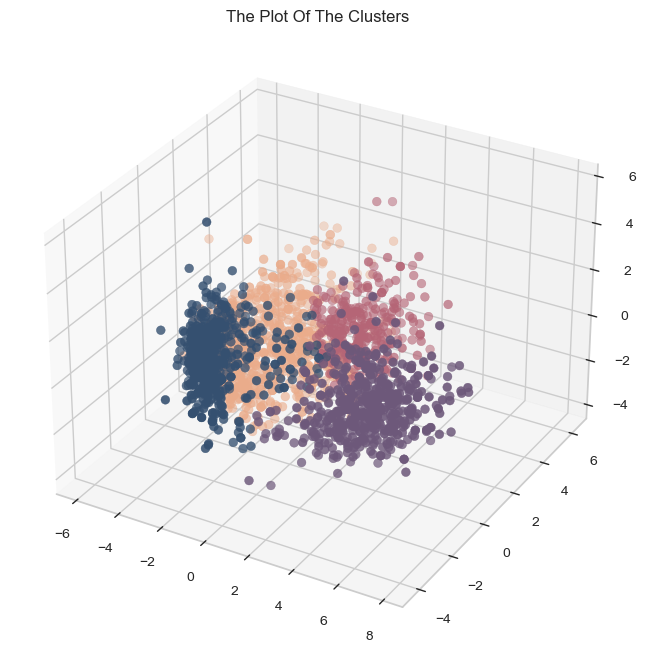

In [65]:


cmap = colors.ListedColormap(["#eaac8b", "#6d587a", "#355070", "#b56576"])
#To view clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_People["Clusters"], marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

### ii. Model 6: K means clustering  

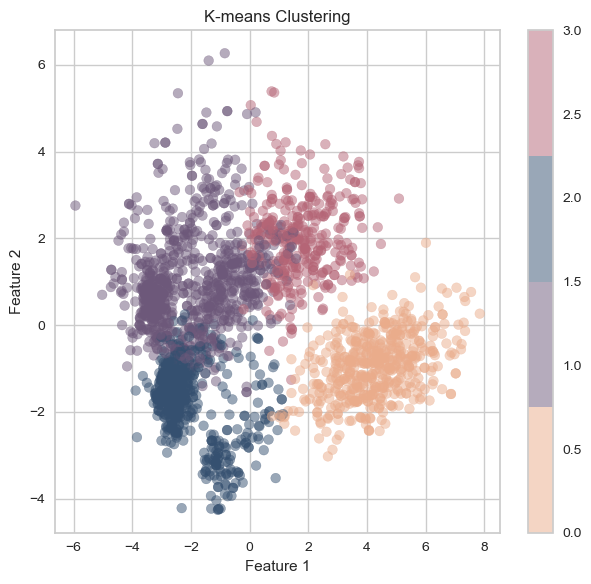

In [66]:
from sklearn.cluster import KMeans

# Convert DataFrame to NumPy array
PCA_People_array = PCA_People.values

# K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(PCA_People_array)
PCA_People["Clusters1"] = Data_AC
#Adding the Clusters feature to the orignal dataframe.
encoded_Pdata["Clusters"]= Data_AC

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(PCA_People_array[:, 0], PCA_People_array[:, 1], c=kmeans_labels, cmap=cmap, alpha=0.5)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

### iii. Model 7: DBSCAN clustering  

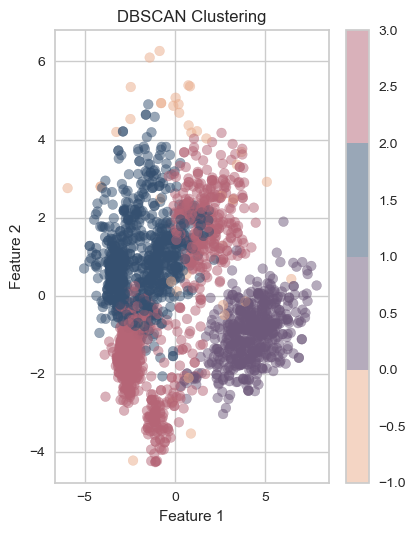

In [67]:
from sklearn.cluster import DBSCAN
# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_People_array)
plt.subplot(1, 2, 2)
plt.scatter(PCA_People_array[:, 0], PCA_People_array[:, 1], c=dbscan_labels, cmap=cmap, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

### Evalation of Clustering
#### Model 5-7
To do this we use 
1. Silhouette score
   - The silhouette score measures the cohesion and separation of clusters by comparing the average distance between data points within the same cluster (cohesion) with the average distance between data points in different clusters (separation).
   - A silhouette score close to 1 indicates dense, well-separated clusters, while a score close to -1 indicates overlapping clusters.
3. Davies-bouldin index
   - The DB index measures the average similarity between each cluster's centroid and the centroids of the clusters that are most similar to it, relative to the average dissimilarity within each cluster.
   - Lower values of the DB index indicate better clustering quality, with smaller values indicating tighter and more well-separated clusters.

In [68]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute silhouette score
silhouette = silhouette_score(PCA_People, Data_AC )
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(PCA_People, Data_AC )
print("Davies–Bouldin Index:", davies_bouldin)


Silhouette Score: 0.48373955868383584
Davies–Bouldin Index: 0.7832814839790168


In [69]:
#Kmeans
silhouette = silhouette_score(PCA_People_array, kmeans_labels )
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(PCA_People_array, kmeans_labels )
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.43050025480590703
Davies–Bouldin Index: 0.8891220762247412


In [70]:
#Dbscan
silhouette = silhouette_score(PCA_People_array, dbscan_labels )
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(PCA_People_array, dbscan_labels )
print("Davies–Bouldin Index:", davies_bouldin)

Silhouette Score: 0.42172765901120957
Davies–Bouldin Index: 1.722228743755401


### Results:

For silhouette score,
We see that the highest score is 0.48373 for agglomerative clustering. HEnce showing that agglomerative clustering may be the best clustering method to use

For Davies-bouldin index
The lowest score is also agglomerative clustering with 0.78 which is the closest to zero. 

Overall: Hence, we choose agglomertive clustering as our clustering method.

## _Identify clusters_
Before we can try to find out the relationship between products and clustered target group, we first identify our clusters. 

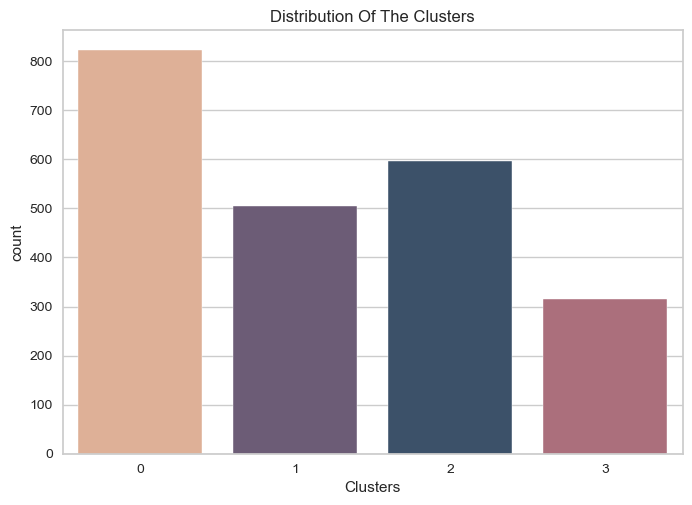

In [71]:

pal=["#eaac8b", "#6d587a", "#355070", "#b56576"]
pl = sb.countplot(x=encoded_Pdata["Clusters"], palette=pal  )
pl.set_title("Distribution Of The Clusters")
plt.show()

<Figure size 800x550 with 0 Axes>

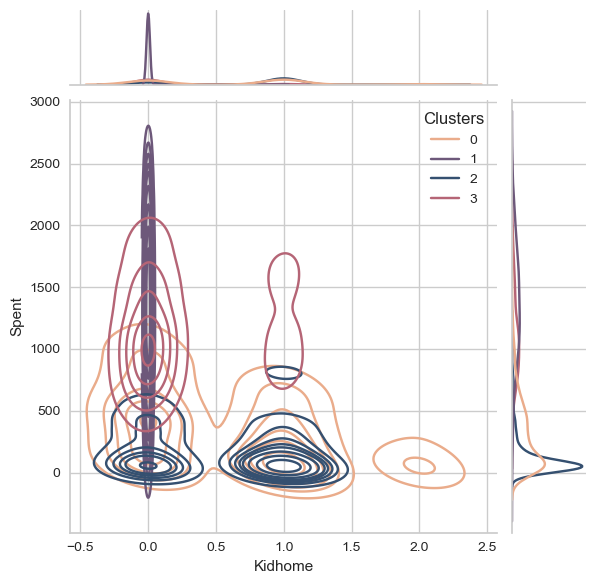

<Figure size 800x550 with 0 Axes>

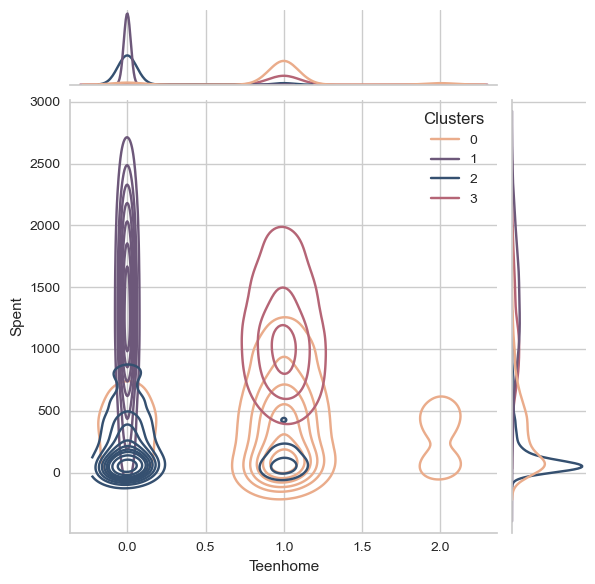

<Figure size 800x550 with 0 Axes>

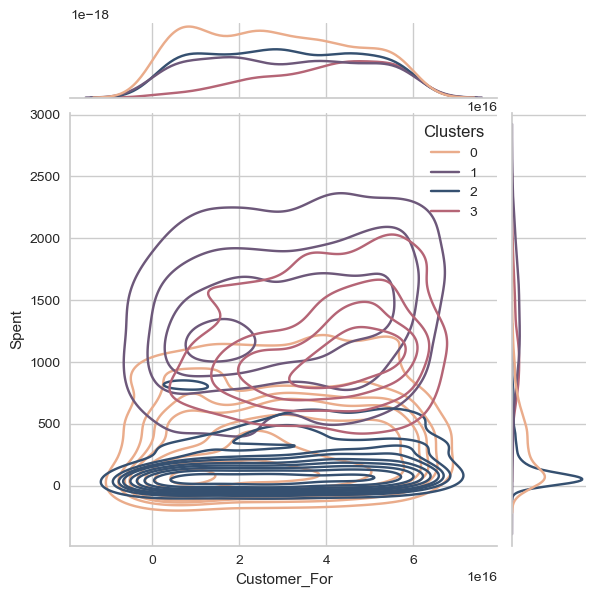

<Figure size 800x550 with 0 Axes>

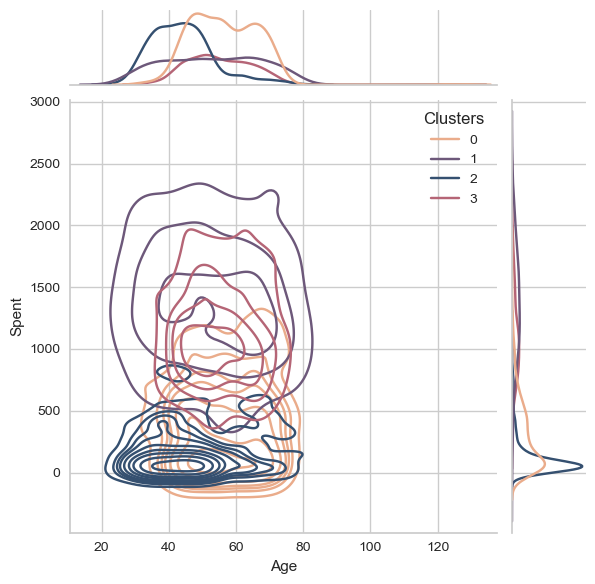

<Figure size 800x550 with 0 Axes>

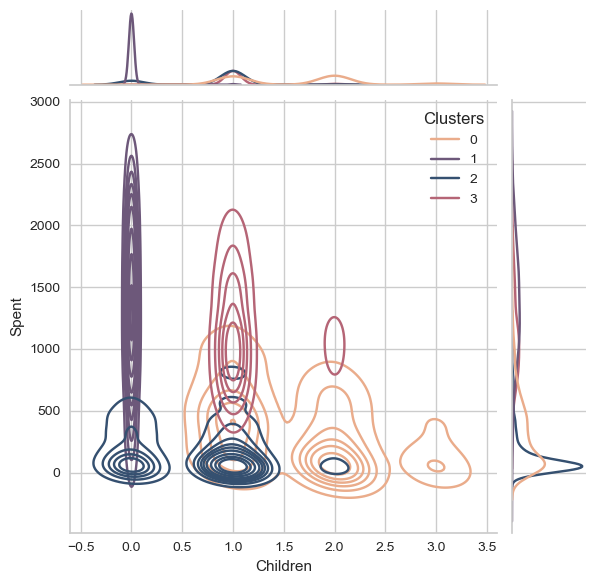

<Figure size 800x550 with 0 Axes>

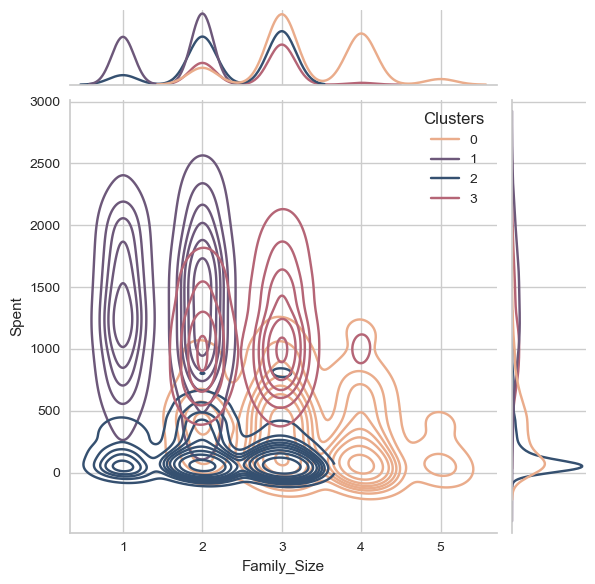

<Figure size 800x550 with 0 Axes>

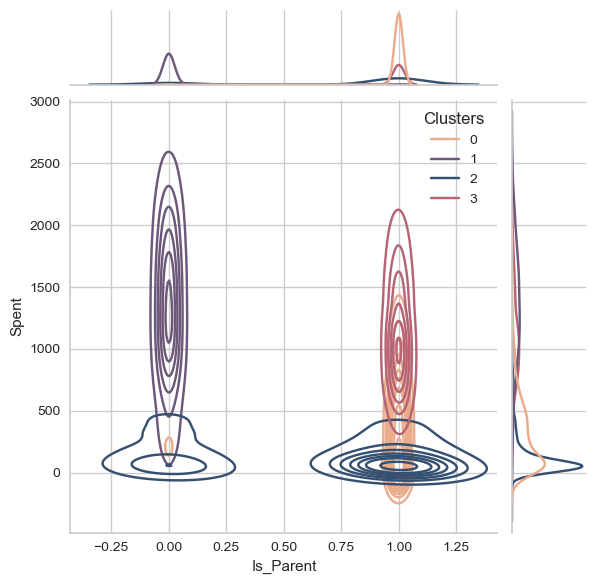

<Figure size 800x550 with 0 Axes>

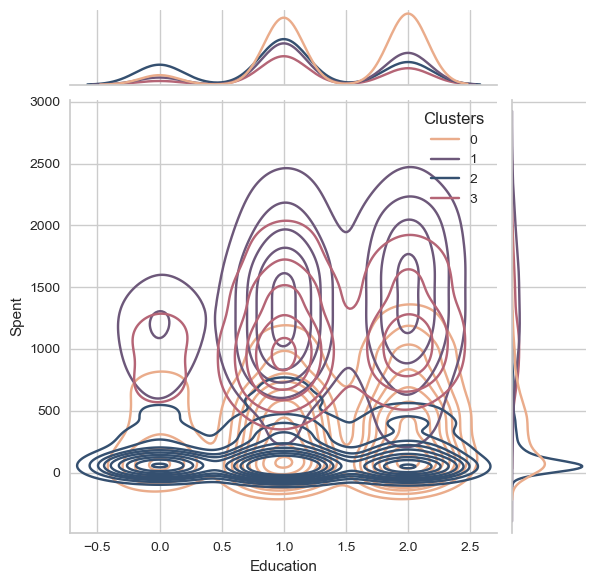

<Figure size 800x550 with 0 Axes>

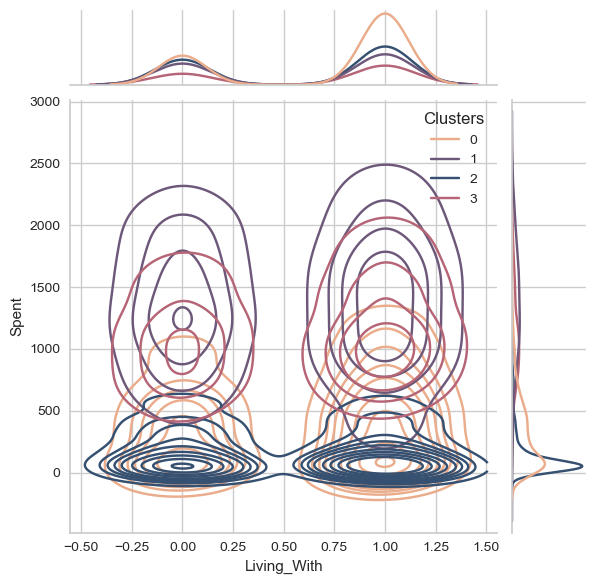

In [72]:

Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sb.jointplot(x=encoded_Pdata[i], y=encoded_Pdata["Spent"], hue =encoded_Pdata["Clusters"], kind="kde", palette=pal)
    plt.show()

## Identify clusters

### Group 0
- low expenditure
- likely to have a teen at home 
- more recent customers
- Highly likely to have children
- If no children, has a partner
- Relatively older 
- Most likely graduate or postgraduate
- May be comprised of single parents 

### Group 1
- spends the most
- has no children but may have a partner
- more likely to be graduate or postgraduate than undergraduate

### Group 2
- relatively younger
- low expenditure
- more likely to be a parent with one child
- education level is slightly varied but more likely to be a graduate

### Group 3
- more likely to be graduate or postgraduate than undergraduate
- Definitely have children
- relatively older
- medium expenditure
- comprised of single parents


## Relating our clusters to Expenditure

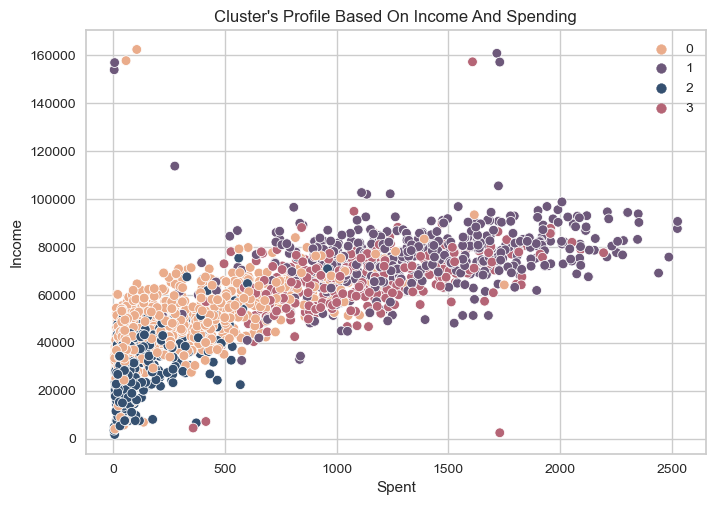

In [73]:
pl = sb.scatterplot(data = encoded_Pdata,x=encoded_Pdata["Spent"], y=encoded_Pdata["Income"],hue=encoded_Pdata["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

We see that 
1. Group 0 has low to medium income and low to medium expenditure
2. Group 1 has high income and high spending
3. Group 2 has low  income and low expenditure
4. Group 3 has medium to high income and medium to high spending

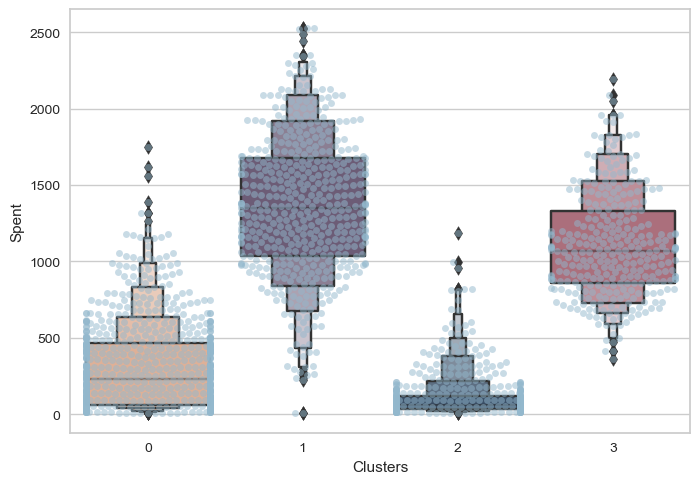

In [74]:
#See distribution of expenditure for each group 
plt.figure()
pl=sb.swarmplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata["Spent"], color= "#93b8cd", alpha=0.5 )
pl=sb.boxenplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata["Spent"], palette=pal)
plt.show()


In this diagram, it is much clearer that cluster 1 spends the most, while cluster 0 and 2 spends the least. 

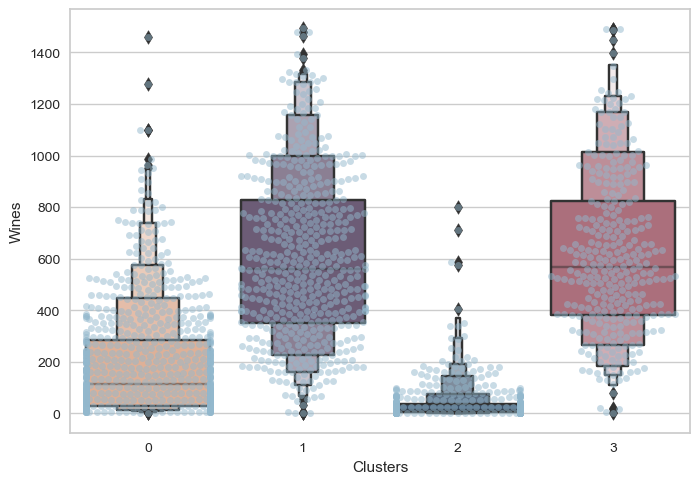

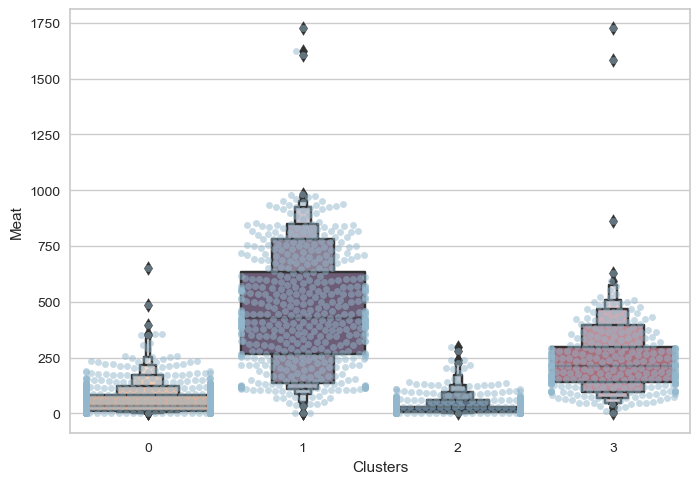

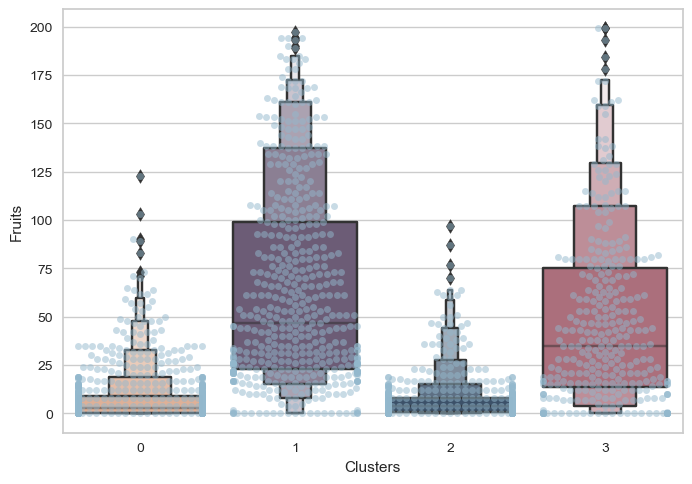

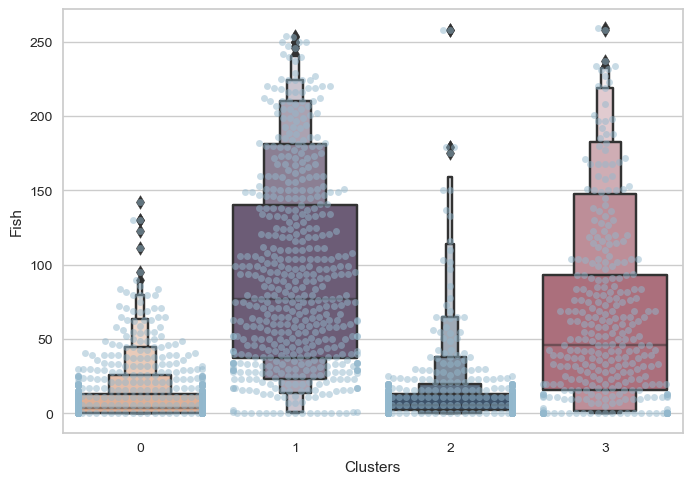

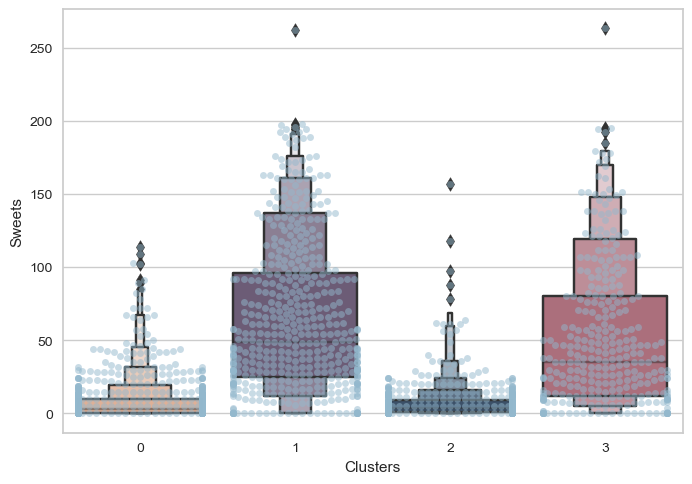

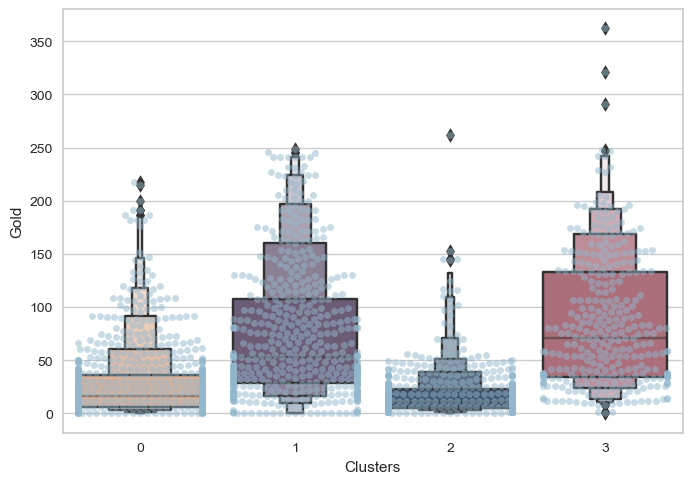

In [75]:
#Identify which products the group are most likely to buy/spend the most on
Products = ["Wines","Meat","Fruits","Fish","Sweets","Gold"]

for i in Products:
    plt.figure()
    pl=sb.swarmplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata[i], color= "#93b8cd", alpha=0.5 )
    pl=sb.boxenplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata[i], palette=pal)
    ax.axis('equal')
    plt.show()



### What each group seems to want to spend on

Based on the data, wine is the most lucrative, followed by meat then gold. 
- All groups spend more on wine then anything else
- Group 1 and 3 have outliers in terms of expenditure on meat, higher than wine.

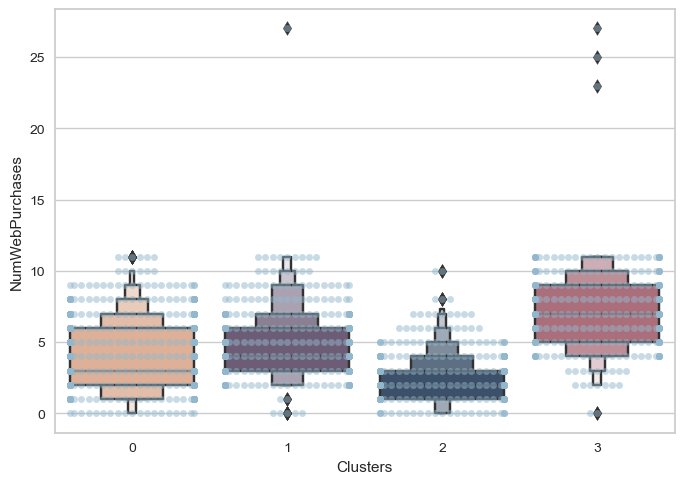

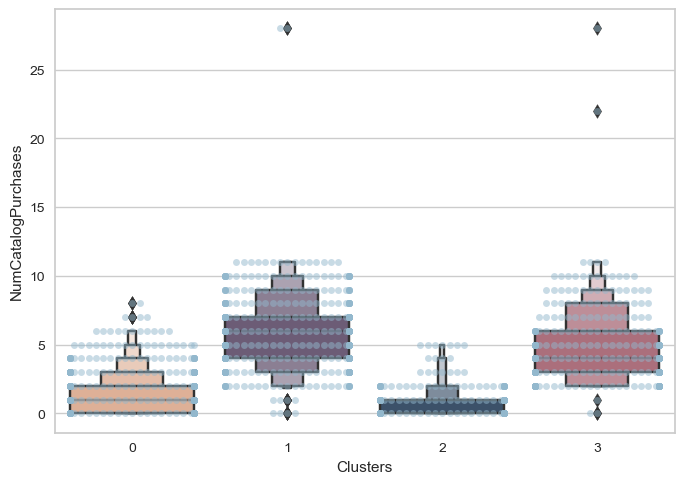

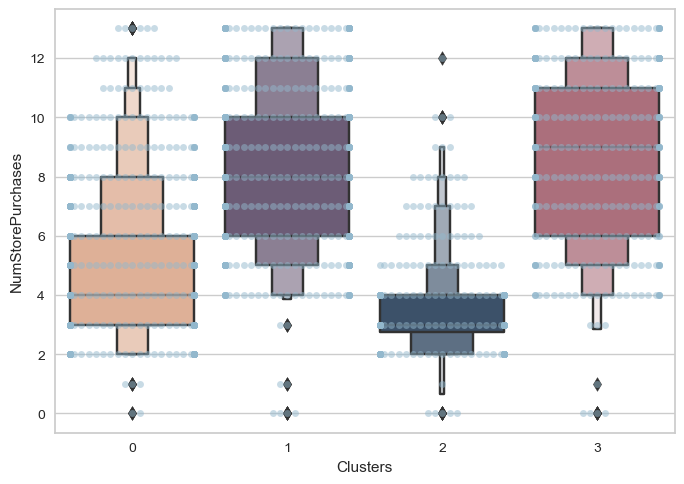

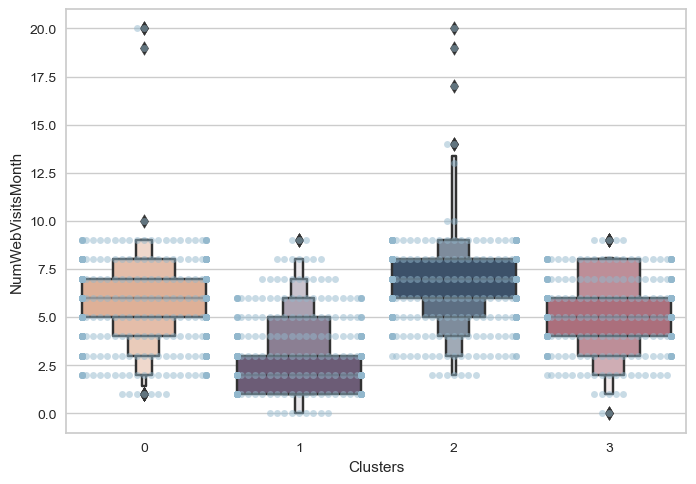

In [76]:
#This function may take a while to upload
#Identify which products the group are most likely to buy/spend the most on
Products = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

for i in Products:
    plt.figure()
    pl=sb.swarmplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata[i],color= "#93b8cd", alpha=0.5 )
    pl=sb.boxenplot(x=encoded_Pdata["Clusters"], y=encoded_Pdata[i], palette=pal)
    plt.show()

In recent years, it is likely that number of web visits and number of web purchases has increased. 

However, based on the current data shown.

Store purchases had the highest total median, but catalog purchases and web pruchases had the highest max value. However, Web purchases did better than catalog purchases for all groups except group 1. Thi means companies may benefit moving resources from catalogs to web development, deals and promotions


Although cluster 2 seemed to have the highest web presence, the web purchases are lower than cluster 0,1,3 which shows that more online promotions or deals targetting group 2 could be beneficial, especially considering how much they use it.

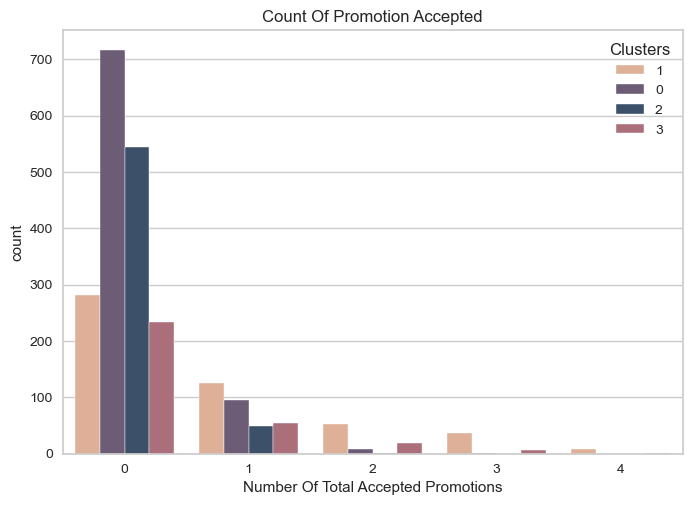

In [77]:
# Convert 'Clusters' column to string type
encoded_Pdata['Clusters'] = encoded_Pdata['Clusters'].astype(str)

# Calculate total promotions accepted
encoded_Pdata["Total_Promos"] = encoded_Pdata["AcceptedCmp1"] + encoded_Pdata["AcceptedCmp2"] + encoded_Pdata["AcceptedCmp3"] + encoded_Pdata["AcceptedCmp4"] + encoded_Pdata["AcceptedCmp5"]

# Plotting count of total campaign accepted with specified order and color palette
plt.figure()
pl = sb.countplot(x=encoded_Pdata["Total_Promos"], hue=encoded_Pdata["Clusters"], palette=pal, order=encoded_Pdata["Total_Promos"].unique()) # Specifying order of x-axis values
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


This shows that the campaigns may not be very effective afterall. As shown, most dont take part in the campaign, only cluster 1 participated in almost all of them. While cluster 0 had the highest number of participation. This could be because of poor publicity. Improvements could be made or company can steer away from campaigns and focus on other methods of increasing expenditure.

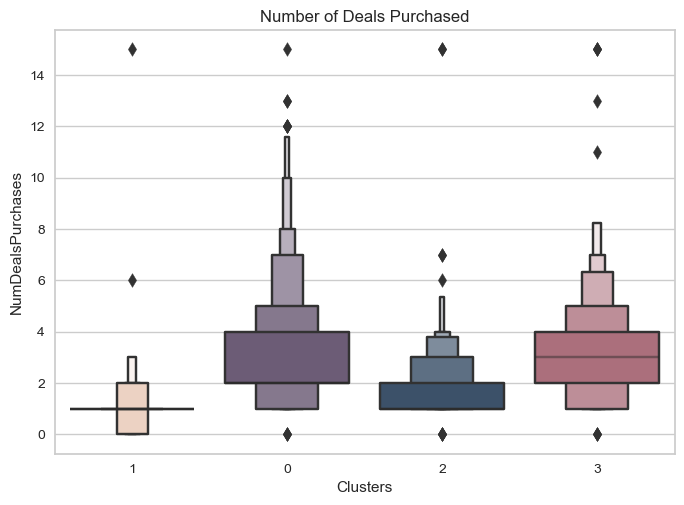

In [78]:
#Plotting the number of deals purchased
plt.figure()
pl=sb.boxenplot(x=encoded_Pdata["Clusters"],y=encoded_Pdata["NumDealsPurchases"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did better. It has best outcome with cluster 0 and cluster 3. However, cluster 1(Highest expenditure) dont seem to be as enticed by the deals but the campaigns. Cluster 2 dont seem particularly taken in by either campaigns or deals.

#### Evaluation of model 5
Key takeaways:
1. Cluster 1 spends the most
2. Wine is most lucrative.
3. Promotions typically do better than deals but rate of participation decreases over time
4. The gap between number of Store puchases to catalog and web purchases are close, hence it might be beneficial to have more online deals to capitalise on the online market. 


## d. Classification
### Model 8: Random Forest Classifier
Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions to improve the accuracy and robustness of the model. Each decision tree in the Random Forest is trained on a random subset of the training data and a random subset of the features. This randomness helps prevent overfitting and increases the diversity of the individual trees.We applied random forest to identify important features that impact on whether promotion is accepted or not and assess the probability of promotion being accepted.

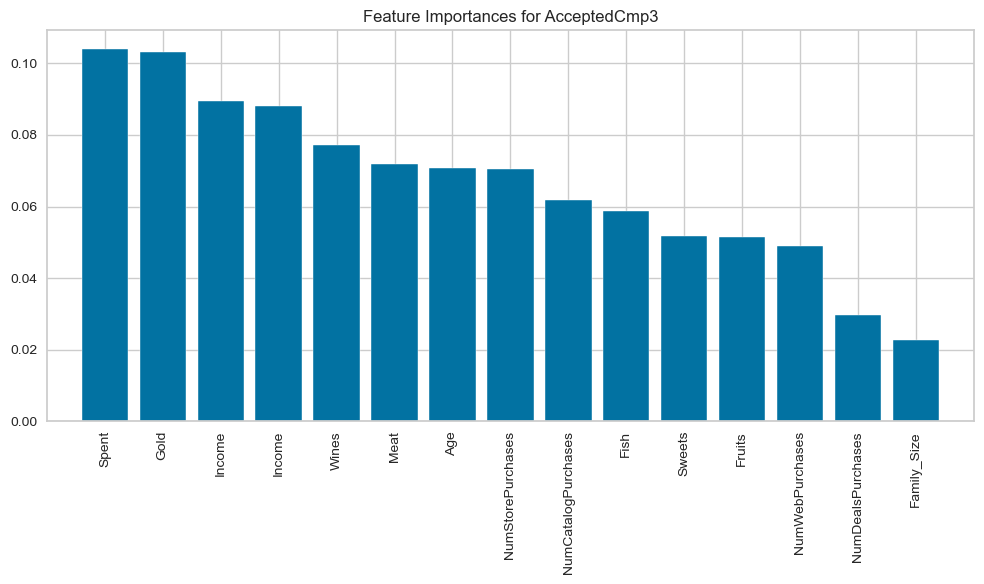

Accuracy for AcceptedCmp3 : 0.9196428571428571


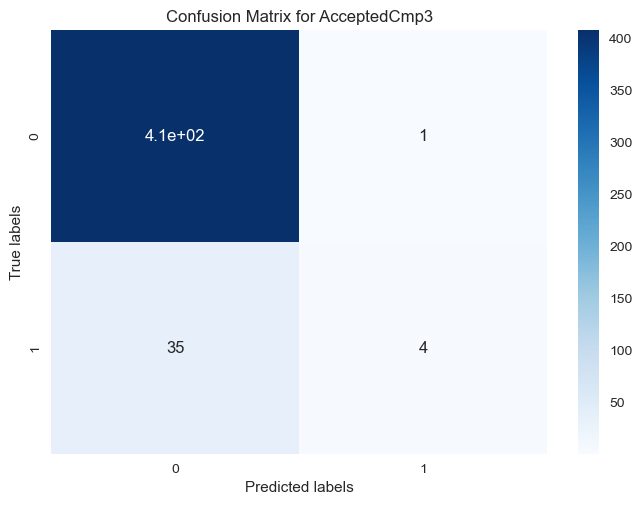

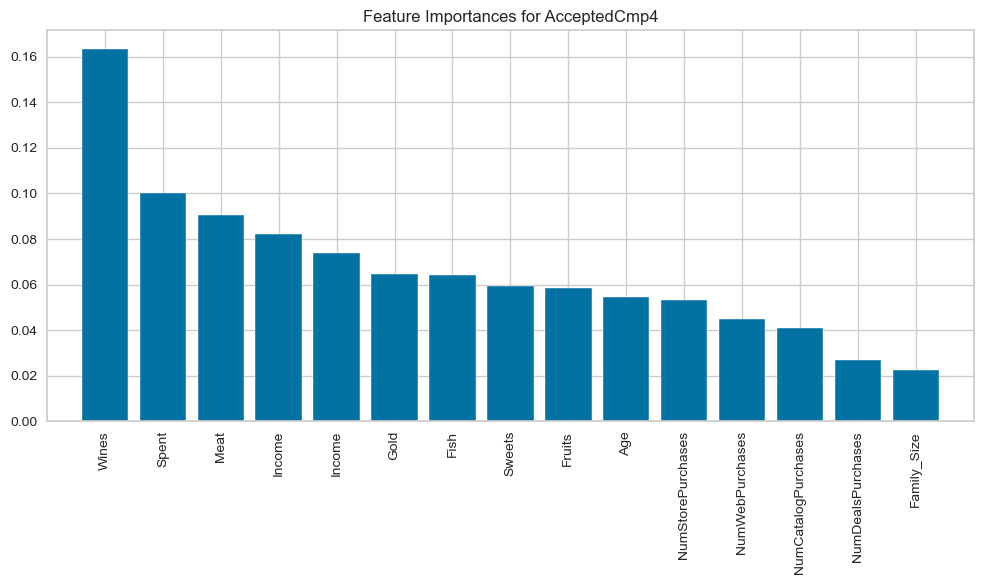

Accuracy for AcceptedCmp4 : 0.9196428571428571


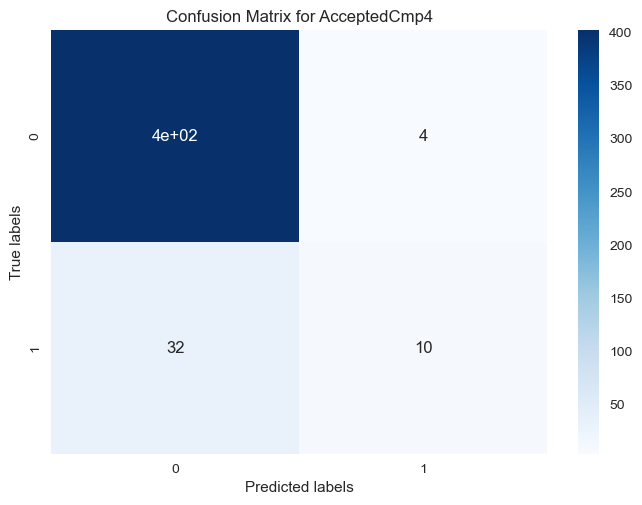

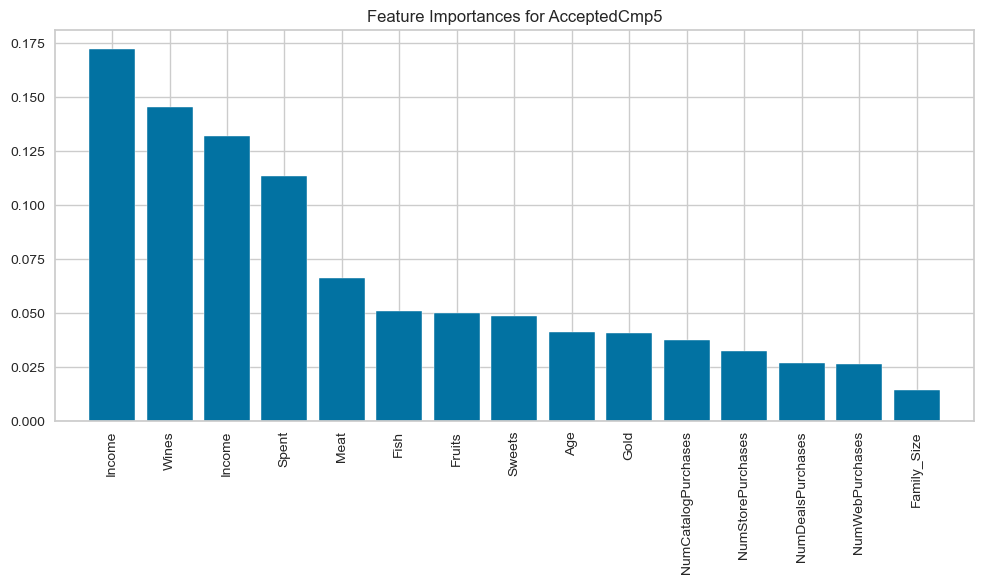

Accuracy for AcceptedCmp5 : 0.9665178571428571


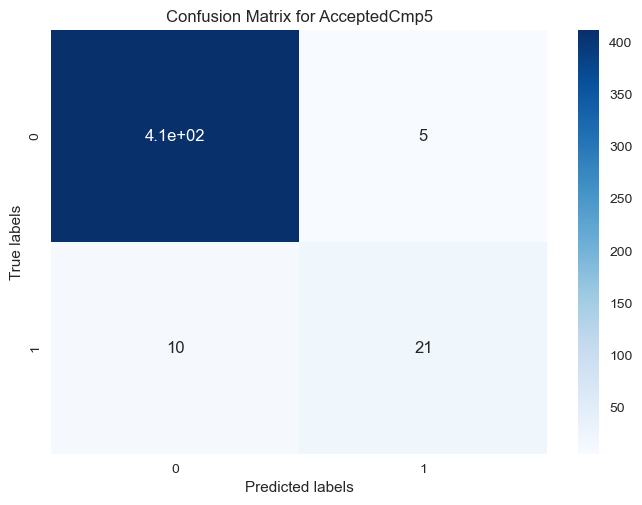

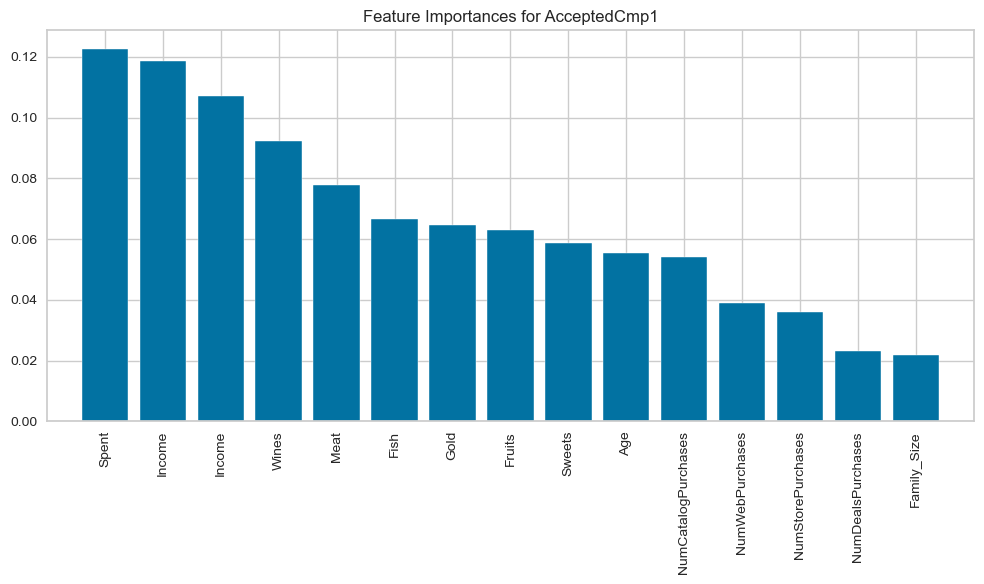

Accuracy for AcceptedCmp1 : 0.953125


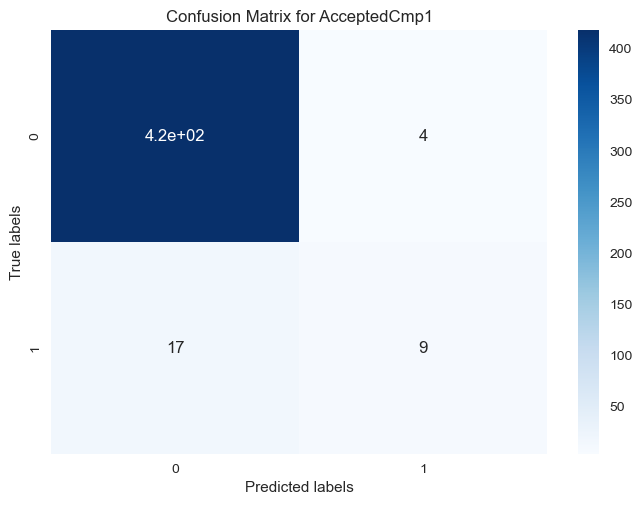

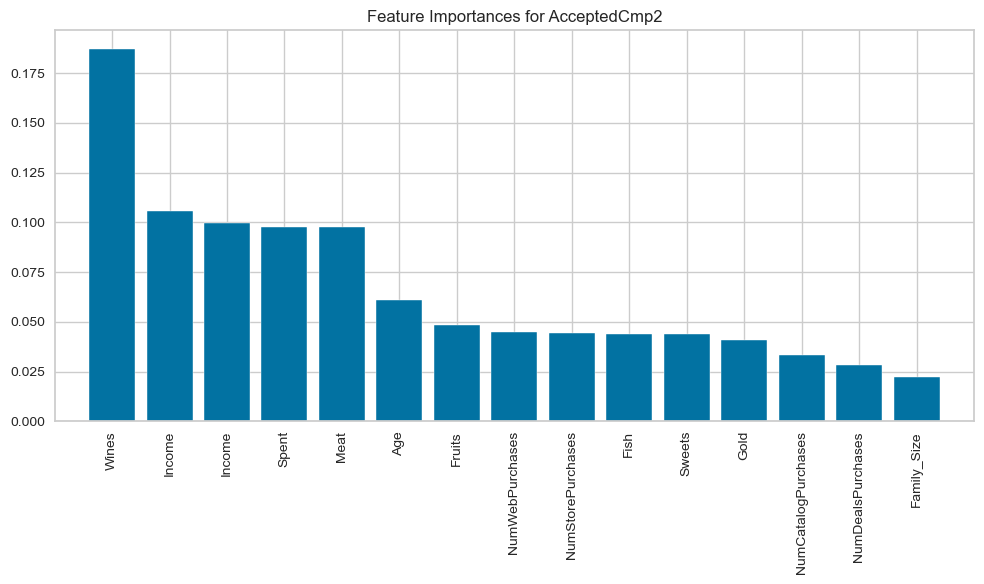

Accuracy for AcceptedCmp2 : 0.9888392857142857


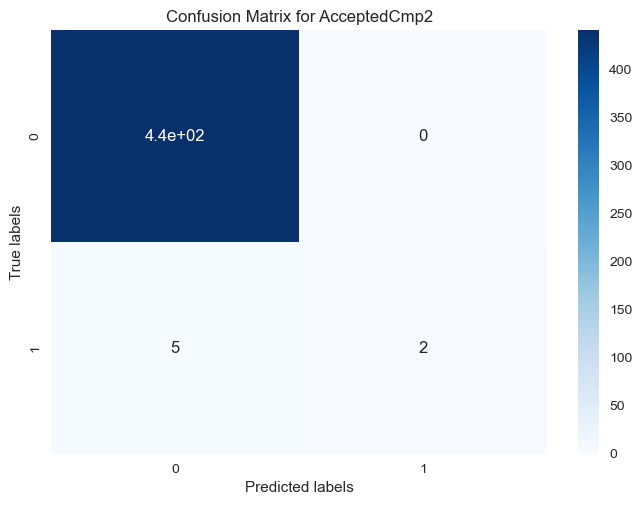

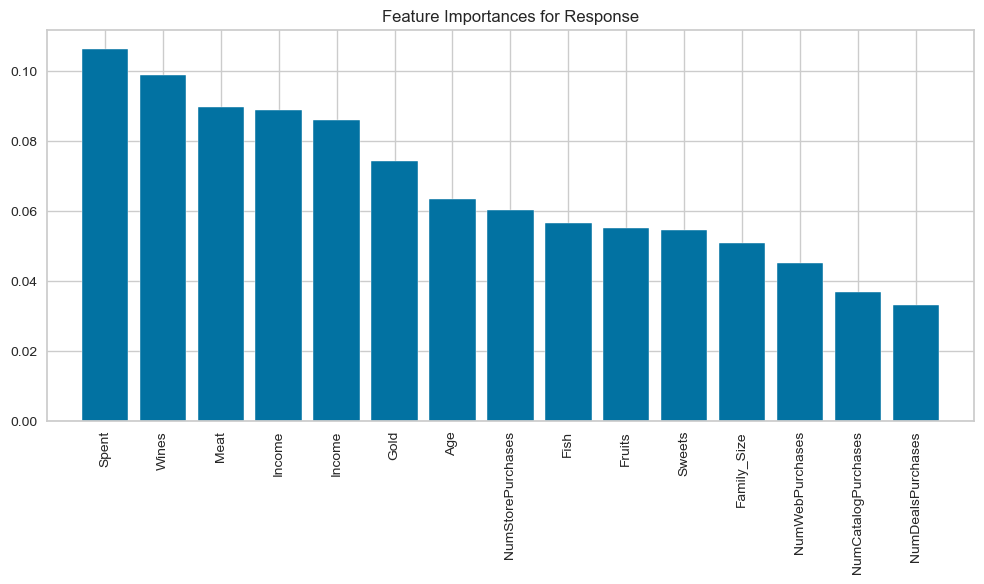

Accuracy for Response : 0.8549107142857143


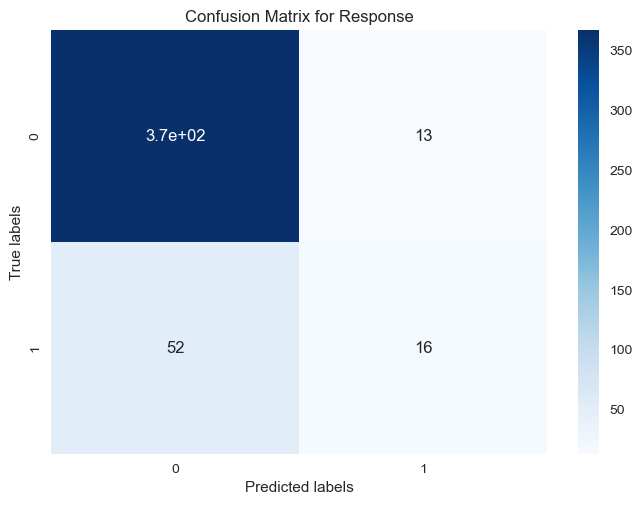

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

PredictPromo = ["AcceptedCmp3", 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

# We choose features we believe would likely influence the probability of promotion being accepted
CustomerFeatures = ['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'Family_Size', 'Income',
                    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Spent", "NumDealsPurchases"]

for pp in PredictPromo:
    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(encoded_Pdata[CustomerFeatures], encoded_Pdata[pp],
                                                        test_size=0.2, random_state=42)

    # Train the model on the training data
    random_forest_classifier.fit(X_train, y_train)

    # Get feature importances
    feature_importances = random_forest_classifier.feature_importances_

    # Get the names of the features
    feature_names = X_train.columns

    # Sort feature importances in descending order
    indices = feature_importances.argsort()[::-1]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances for " + pp)
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout()
    plt.show()

    # Make predictions on the test data
    y_pred = random_forest_classifier.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy for", pp, ":", accuracy)

    # Visualize the confusion matrix using heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix for ' + pp)
    plt.show()


### Evaluation of model 8: Random forest Classifier

We can see indicators of what features would likely impact an accepted promotion. In this case, we see that Spent, wine and income are the biggest indicators. Hence companies could have more promotions for wine, or catered to individuals who spend less.  Although the accuracy value is high, this could be because of an imbalanced dataset, which may lead to skewed data. As such, gathering more data or generating synthetic sample in the future may be beneficial.


<Axes: xlabel='Wines', ylabel='AcceptedCmp1'>

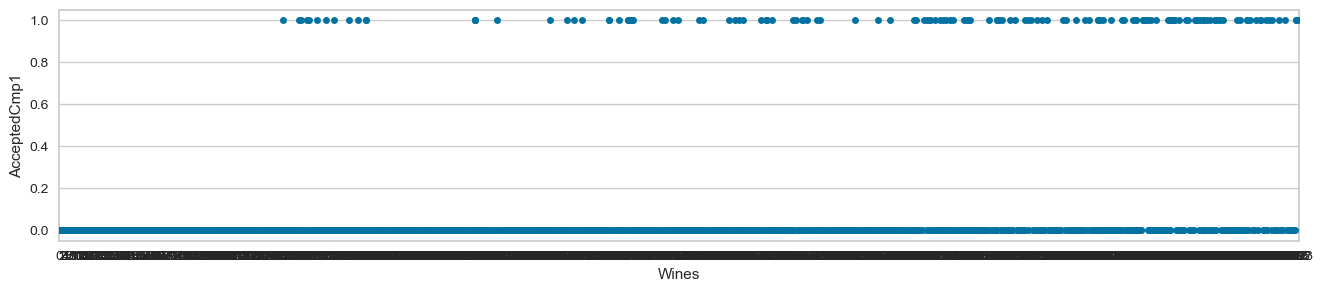

In [85]:
# Rating vs Amount
f = plt.figure(figsize=(16, 3))
sb.stripplot(x = 'Wines', y = 'AcceptedCmp1', data = encoded_Pdata)

<Axes: xlabel='Spent', ylabel='AcceptedCmp1'>

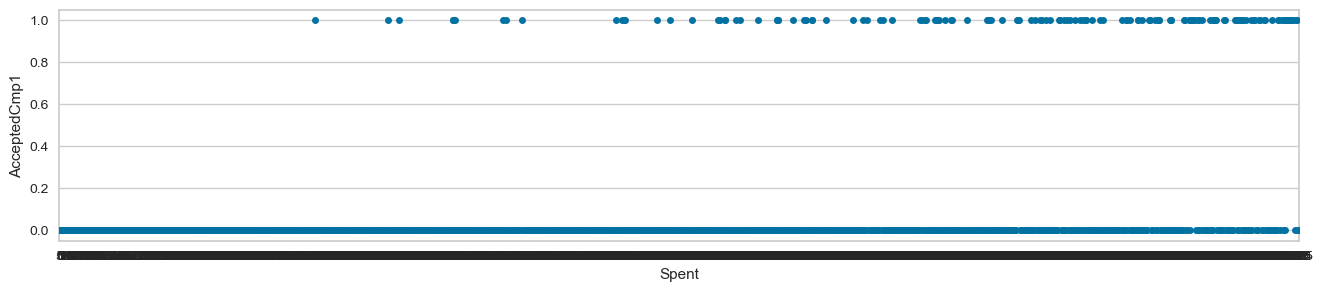

In [86]:
# Rating vs Amount
f = plt.figure(figsize=(16, 3))
sb.stripplot(x = 'Spent', y = 'AcceptedCmp1', data =encoded_Pdata)

<Axes: xlabel='Income', ylabel='AcceptedCmp1'>

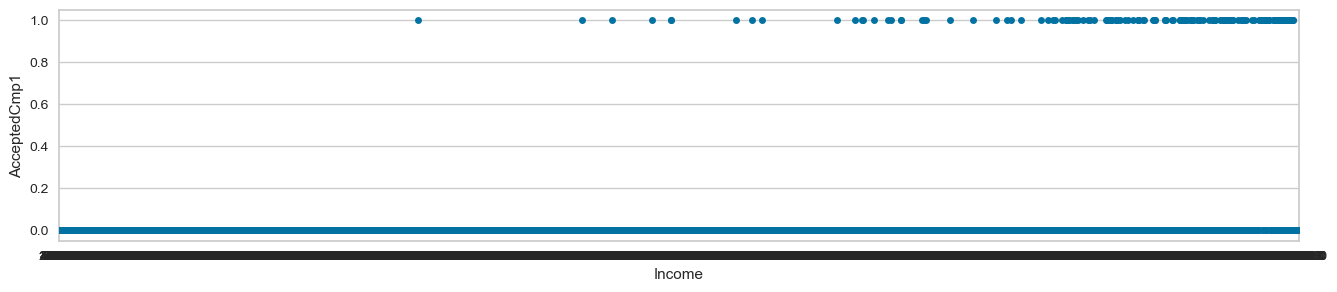

In [87]:
# Rating vs Amount
f = plt.figure(figsize=(16, 3))
sb.stripplot(x = 'Income', y = 'AcceptedCmp1', data =encoded_Pdata)

### Continuation of Evaluation of model 8: Random forest Classifier
The increase in acceptance for factor wine is likely because wine is expensive and considered luxury goods. Due to high expenses, consumers are more likely to take advantage of the promotion for wine and spent. We also see, quite surprisingly that increase in income increases likelihood of acceptance of promotion. Hence, more campaigns can be conducted targeting customers of lower income.
 


## e.KNN
### Model 9: KNN Recommendation System
KNN Recommendation Systems: suggests products to customers based on similarities in purchasing behaviors with other customers. For example, you could recommend wines to a customer who has similar purchasing patterns in meats or fruits as others who tend to buy the same item

In [80]:
#the code:
scaler = StandardScaler()
features = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
PersonData[features] = scaler.fit_transform(PersonData[features])

# Fit KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(PersonData[features])

# Function to recommend products ( based on products least purchased)
def recommend_products(customer_index, data, model):
    
    distances, indices = model.kneighbors([data.iloc[customer_index][features]])
    
    recommended_products = data.iloc[indices[0]][features].mean().sort_values(ascending=False)
   
    bought_products = data.iloc[customer_index][features]
    
    return recommended_products[bought_products < bought_products.median()]


In [82]:
# Example: Recommend products for the first customer in the dataset
recommendations = recommend_products(0, PersonData, knn)
print(recommendations)

Sweets    1.490556
Wines     0.951842
Gold      0.662611
dtype: float64


### Evaluation of model 9

Positive Values indicate these products are bought more by the customer's neighbors than the average customer.Higher Values indicate a product is particularly popular among those neighbors.
The higher the number is, the stronger preference for that product among the neighbors.
This model could be used for other customers 

## _-Conclusion for each model we focused on in relation to the question_:
### Model 1: Linear Regression
- Based on linear regression, we see that family size, income, age and parenthood are suitable factors to predict customer expenditure

### Model 2: Logistics Regression
-We see that key features may be Age and income over other factors such as family size

### Model 3: GBM regressor
-Compares Age, income and family size to see how it affects expenditure and types of purchases. We see different results to model 2 that family size and income are more important features. We see that GBM may be a better predictor than linear regression when comparing the R^2 value for spent. 

### Model 4: Hill Climbing
-Using family size and income, we see that we can maximise profits by focusing on family size of 4 and income is $44602 

### Model 5-7: Agglomerative Clustering, K meanas clustering, DBSCAN clustering
- Choosing Model 5, as it fits the best.
- We see that there are 4 main target groups. 
- Machine learning algorithm seems to have identified age, income and family size to be proportional with expenditure, affirming previous models. 
- Further, we see meat and wine to bring the most revenue. 
- We see that the store to catalog purchase ratio is small, suggesting that a focus on websites and online promotions may work well in improving revenue for company.
- Further, we see that campaigns did better than deals though it decreased over time. Hence, more can be done to improve customer participation and spending 

### Which model would be the most suitable predictor of customer features? 
Agglomerative clustering may be the best measure of influence on expenditure.This is because it takes into consideration all the features in a dataset equally instead of isolating values that we believe may be important. 

### Model 8: Random Forest classifier 
-We can see indicators of what features would likely impact an accepted promotion. We see that wine, income and spent are important features.

### Model 9: KNN
-This model is beneficial for companies which can add this model into their websites to provide recommendations that customers are most likely to be enticed by


# Our overarching conclusion 
### How can we succinctly assess individual features' influence on expenditure and promotional outcomes?

Overall, the models point to age, income and family size as suitable features on expenditure.
While Random Forest classifier points to wine, income and spent to be important features in predicting promotional outcome. 

